# Data Exploration of the EUROPEAN SOCCER DATASET football 
- data from 2008 to 2016
- Link: https://www.kaggle.com/datasets/hugomathien/soccer?resource=download
- The dataset contains data of 11 European countries with their lead championship.

## Preview

In [472]:
DATA_PATH = './../../data/soccer/European_Soccer_Database/database.sqlite'

In [473]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [474]:
conn = sqlite3.connect(DATA_PATH)

In [475]:
#Show all tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [476]:
# Show all columns in the table
columns = pd.read_sql("PRAGMA table_info('Match')", conn)
columns

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,country_id,INTEGER,0,None,0
2,2,league_id,INTEGER,0,None,0
3,3,season,TEXT,0,None,0
4,4,stage,INTEGER,0,None,0
...,...,...,...,...,...,...
110,110,GBD,NUMERIC,0,None,0
111,111,GBA,NUMERIC,0,None,0
112,112,BSH,NUMERIC,0,None,0
113,113,BSD,NUMERIC,0,None,0


In [477]:
matchs = pd.read_sql("SELECT * FROM Match", conn)

In [478]:
matchs.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### Missing values

In [479]:
matchs['year'] = pd.to_datetime(matchs['date']).dt.year

In [480]:
# percenatge of non null value by season
matchs['home_player_X1'].groupby(matchs['season']).count() / matchs['home_player_X1'].groupby(matchs['season']).size()

season
2008/2009    0.741130
2009/2010    0.925697
2010/2011    0.926380
2011/2012    0.925466
2012/2013    0.926380
2013/2014    1.000000
2014/2015    1.000000
2015/2016    1.000000
Name: home_player_X1, dtype: float64

In [481]:
value = 'BWH'
matchs[value].groupby(matchs['season']).count() / matchs[value].groupby(matchs['season']).size()

season
2008/2009    0.870415
2009/2010    0.865944
2010/2011    0.869325
2011/2012    0.873602
2012/2013    0.867791
2013/2014    0.857190
2014/2015    0.873083
2015/2016    0.873422
Name: BWH, dtype: float64

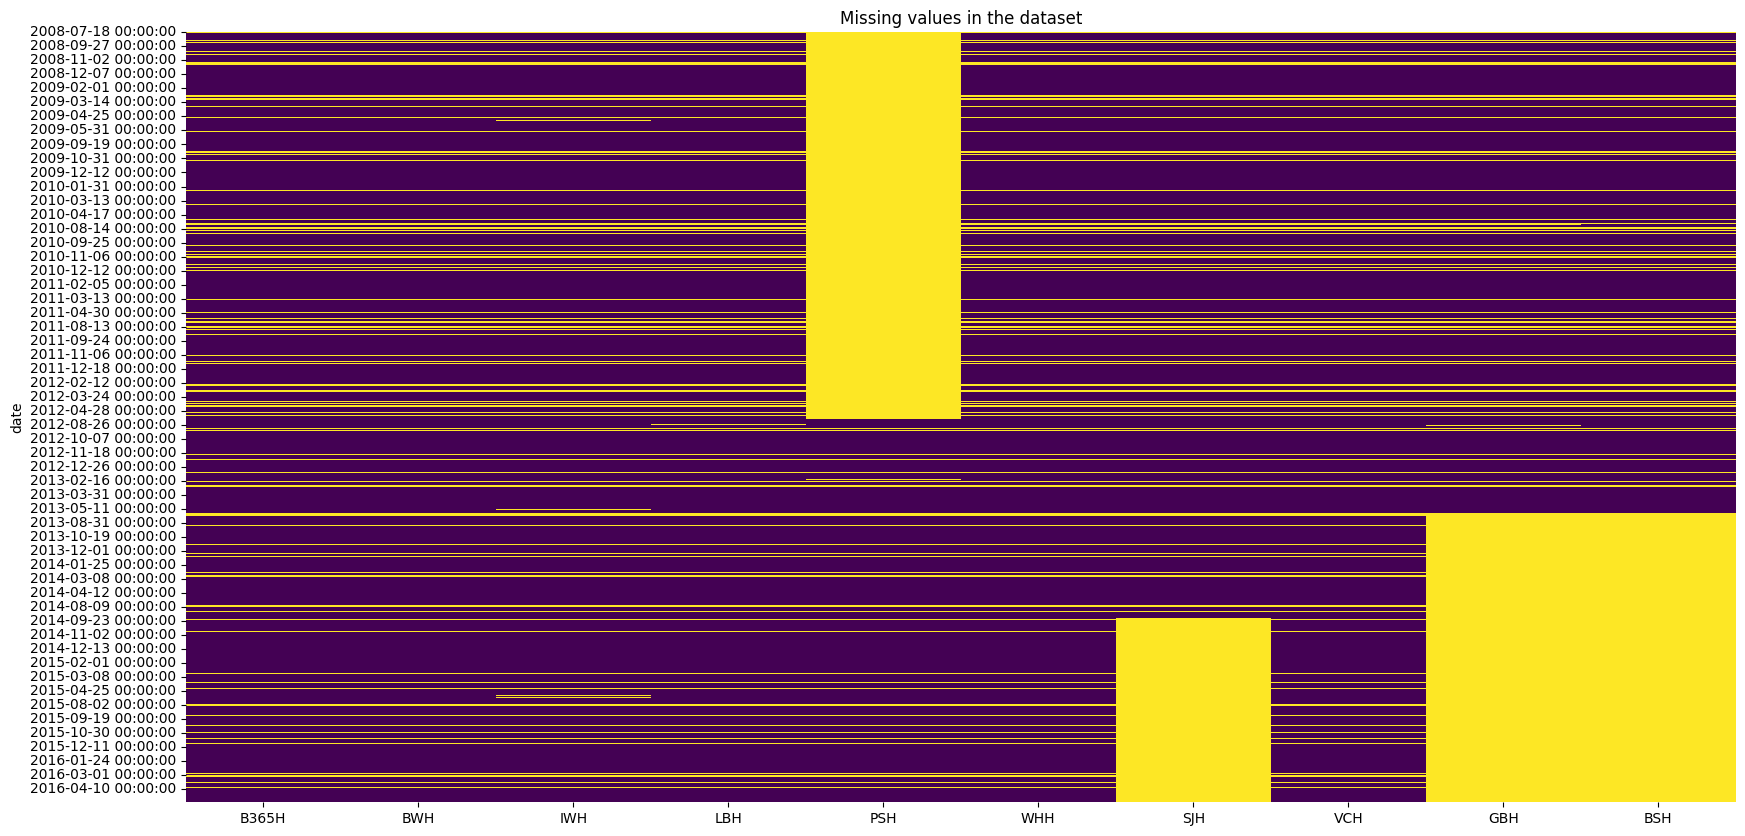

In [482]:
ar = matchs[['date', 'B365H', 'BWH', 'IWH', 'LBH', 'PSH', 'WHH', 'SJH', 'VCH', 'GBH', 'BSH']]
ar = ar.set_index('date')
ar = ar.sort_index()
ar = ar.isnull().astype(int)

plt.figure(figsize=(20, 10))
sns.heatmap(ar, cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()



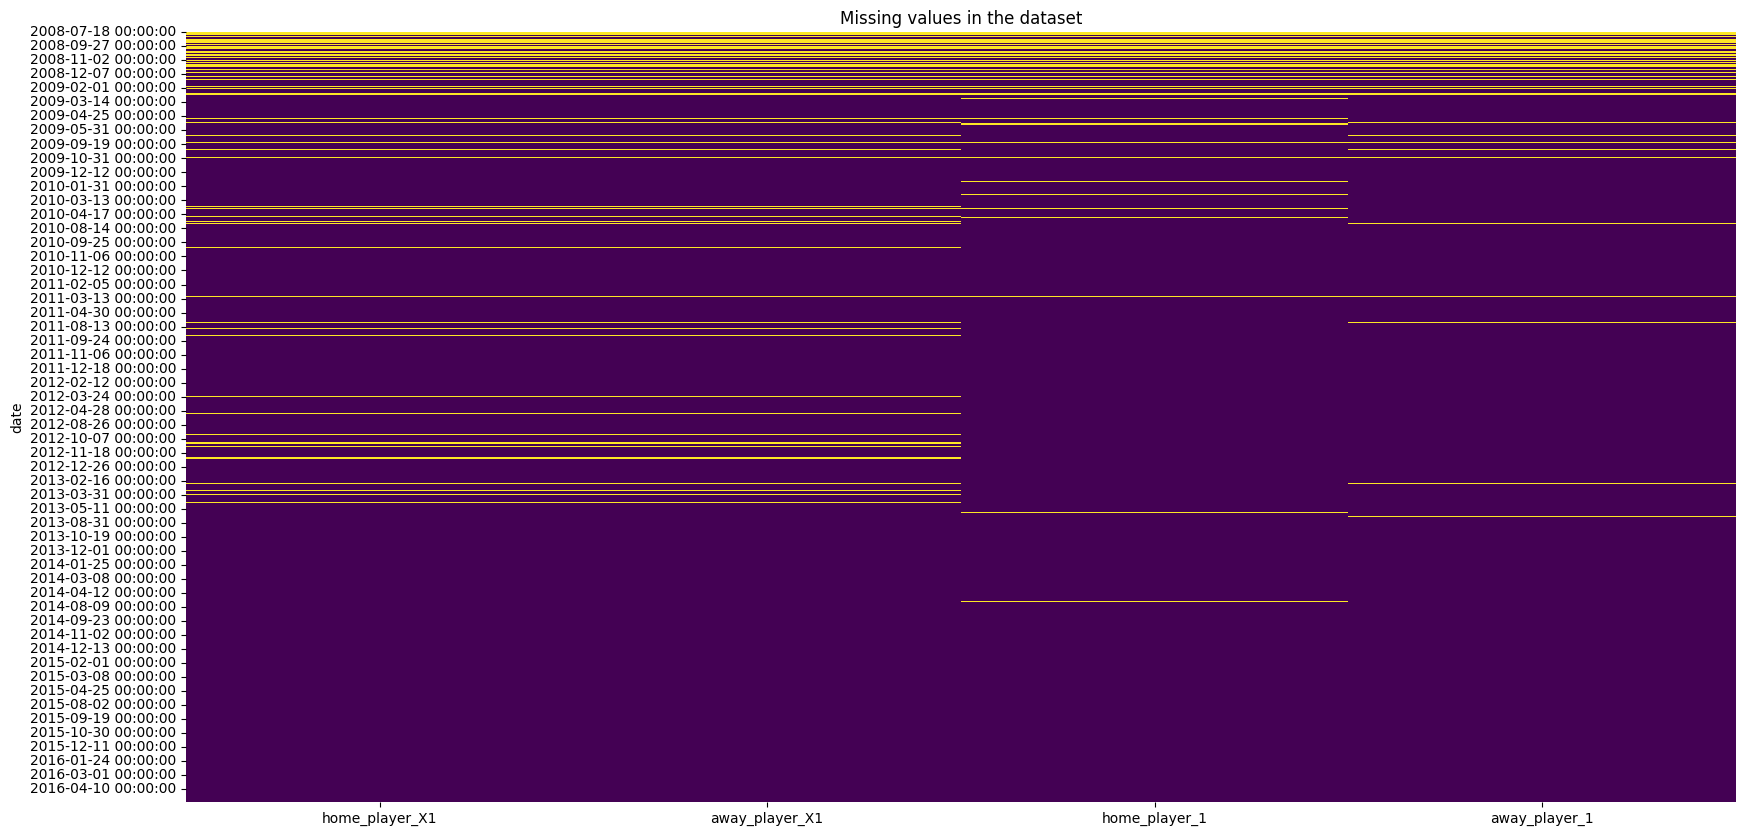

In [483]:
ar = matchs[['date', 'home_player_X1', 'away_player_X1', 'home_player_1', 'away_player_1', ]]
ar = ar.set_index('date')
ar = ar.sort_index()
ar = ar.isnull().astype(int)

plt.figure(figsize=(20, 10))
sns.heatmap(ar, cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

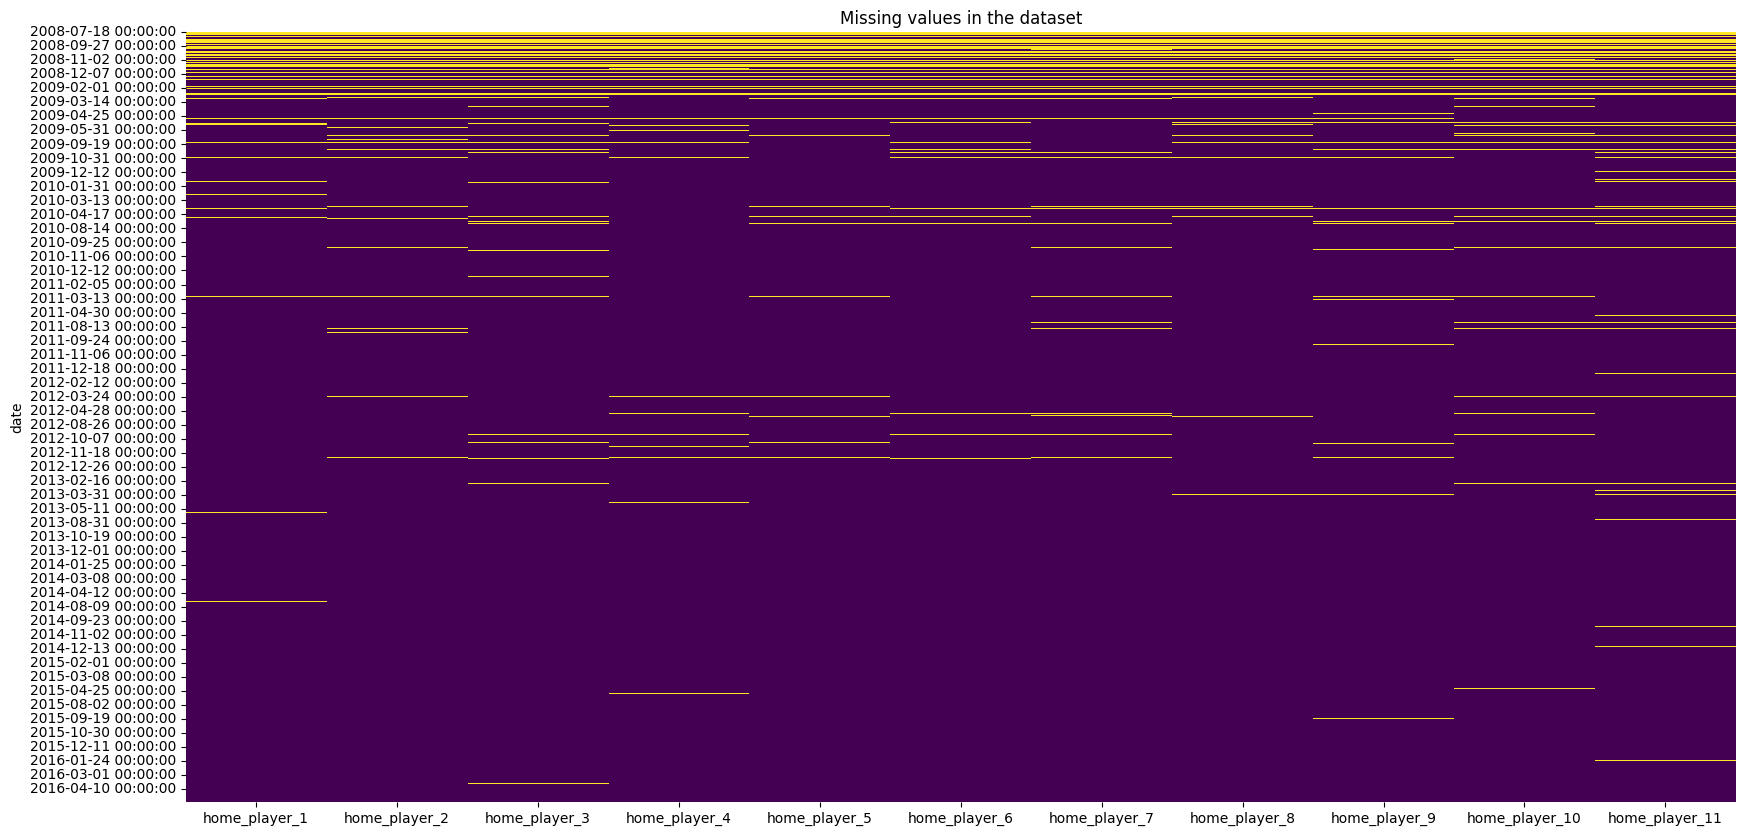

In [484]:
ar = matchs[['date', 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11']]
ar = ar.set_index('date')
ar = ar.sort_index()
ar = ar.isnull().astype(int)

plt.figure(figsize=(20, 10))
sns.heatmap(ar, cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

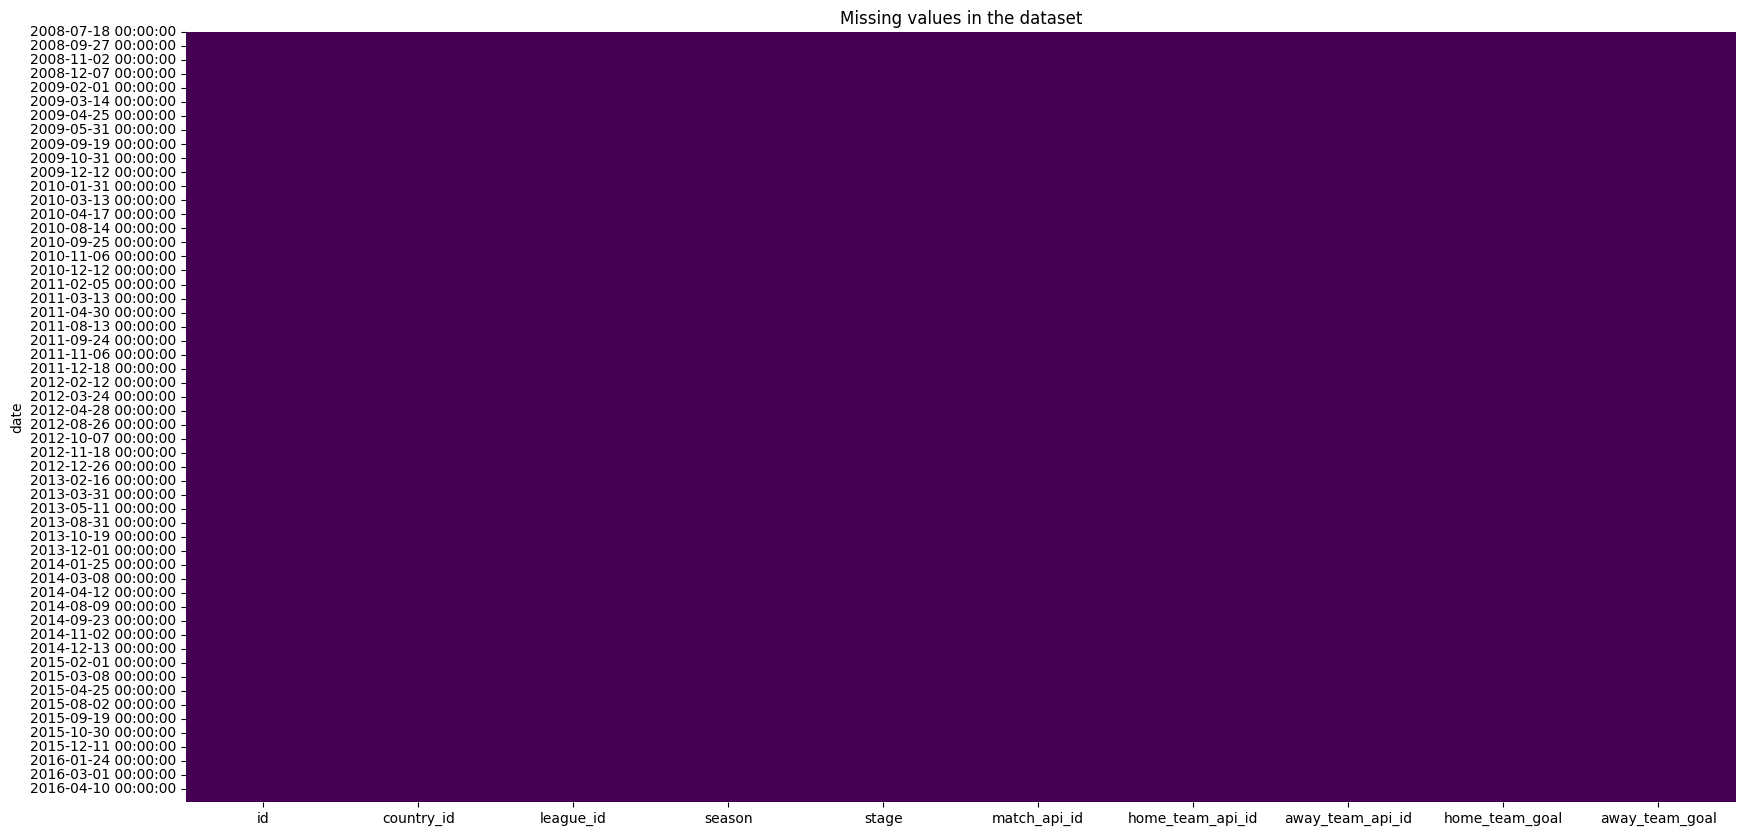

In [485]:
ar = matchs[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal',]]
ar = ar.set_index('date')
ar = ar.sort_index()
ar = ar.isnull().astype(int)

plt.figure(figsize=(20, 10))
sns.heatmap(ar, cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

In [486]:
[ 'goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession']

['goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession']

In [487]:
# show non nul values for goal col
matchs[[ 'goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession']][matchs['goal'].notnull()]


,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
1728,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...
1729,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...
1730,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...
1731,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...
1732,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...
...,...,...,...,...,...,...,...,...
25944,<goal><value><comment>o</comment><stats><owngo...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
25945,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
25946,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
25947,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />


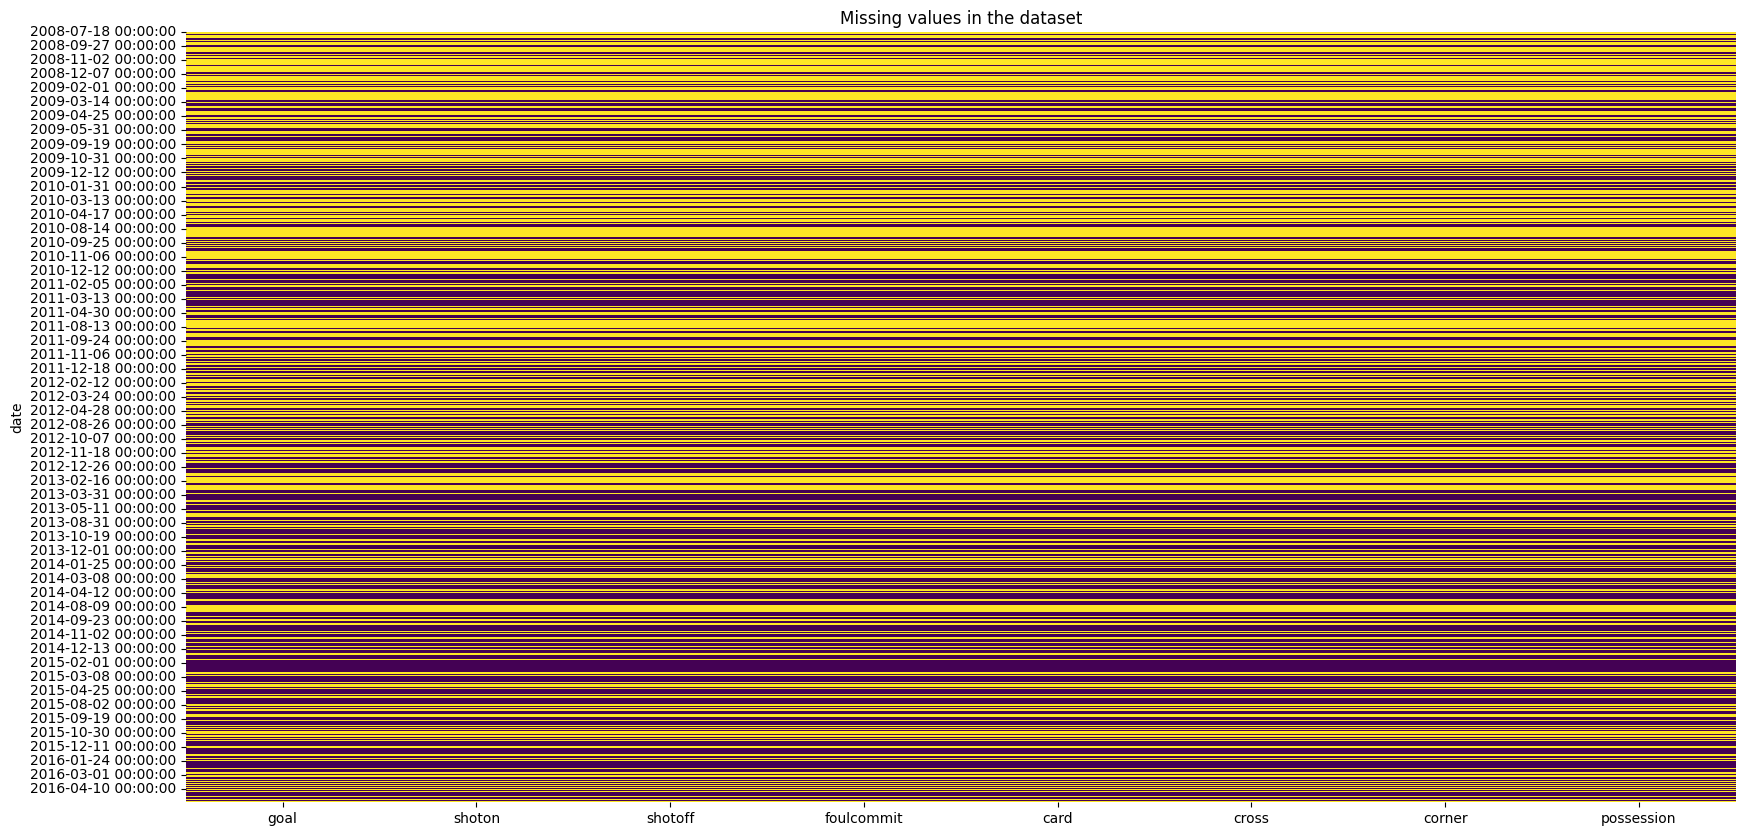

In [488]:
ar = matchs[['date',  'goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession']]
ar = ar.set_index('date')
ar = ar.sort_index()
ar = ar.isnull().astype(int)

plt.figure(figsize=(20, 10))
sns.heatmap(ar, cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

In [489]:
matchs.columns[75:]

Index(['away_player_10', 'away_player_11', 'goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'year'],
      dtype='object')

In [490]:
matchs['FTR'] = matchs.apply(lambda x: 1 if x['home_team_goal'] > x['away_team_goal'] else 0 if x['home_team_goal'] == x['away_team_goal'] else -1, axis=1)

### Proportion of each class

In [491]:
proportion_home_win = matchs[matchs['FTR'] == 1].shape[0] / matchs.shape[0]
proportion_draw = matchs[matchs['FTR'] == 0].shape[0] / matchs.shape[0]
proportion_away_win = matchs[matchs['FTR'] == -1].shape[0] / matchs.shape[0]

print(f'Proportion of home win: {proportion_home_win}')
print(f'Proportion of draw: {proportion_draw}')
print(f'Proportion of away win: {proportion_away_win}')

Proportion of home win: 0.45871665576042187
Proportion of draw: 0.25389737865198814
Proportion of away win: 0.28738596558759


## Performances of the bookmakers

### Metrics

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$ overall correct predictions on all predictions (no class distinction)

$\text{Precision} = \frac{TP}{TP + FP}$ on the overall positive prediction of the classifier

$\text{Recall} = \frac{TP}{TP + FN}$ on the overall positive instances of the class

$\text{F1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

For a random classifier, which classify each class with the same probability, the metrics are:

$\text{Accuracy} = \frac{1}{n_{\text{classes}}}$

$\text{Precision} = \frac{1}{n_{\text{classes}}}$

$\text{Recall} = \frac{1}{n_{\text{classes}}}$

$\text{F1} = \frac{2}{n_{\text{classes}}}$


### Raw numbers

In [492]:
bookies = ['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'SJ', 'VC', 'GB', 'BS']

def bookie_prediction(row, bookies):
    """
    Return 1 if the home team is the winner according to the bookie, 0 if it's a draw, -1 if the away team is the winner and -2 if the bookie is not able to predict the winner
    """
    if row[f'{bookies}H'] < row[f'{bookies}D'] and row[f'{bookies}H'] < row[f'{bookies}A']:
        return 1
    elif row[f'{bookies}D'] < row[f'{bookies}H'] and row[f'{bookies}D'] < row[f'{bookies}A']:
        return 0
    elif row[f'{bookies}A'] < row[f'{bookies}H'] and row[f'{bookies}A'] < row[f'{bookies}D']:
        return -1
    else:
        return -2

for bookie in bookies:
    matchs[f'{bookie}_prediction'] = matchs.apply(lambda x: bookie_prediction(x, bookie), axis=1)


In [493]:
bookies_on_home = {}
bookies_on_draw = {}
bookies_on_away = {}

home_win = {}
draw_win = {}
away_win = {}

bookies_win_home_bet = {}
bookies_win_draw_bet = {}
bookies_win_away_bet = {}

for bookie in bookies: 
    bookies_on_home[bookie] = matchs[matchs[f'{bookie}_prediction'] == 1][f'{bookie}_prediction'].count()
    bookies_on_draw[bookie] = matchs[matchs[f'{bookie}_prediction'] == 0][f'{bookie}_prediction'].count()
    bookies_on_away[bookie] = matchs[matchs[f'{bookie}_prediction'] == -1][f'{bookie}_prediction'].count()

    home_win[bookie] = matchs[(matchs[f'{bookie}_prediction'] != -2) & (matchs['FTR'] == 1)][f'{bookie}_prediction'].count()
    draw_win[bookie] = matchs[(matchs[f'{bookie}_prediction'] != -2) & (matchs['FTR'] == 0)][f'{bookie}_prediction'].count()
    away_win[bookie] = matchs[(matchs[f'{bookie}_prediction'] != -2) & (matchs['FTR'] == -1)][f'{bookie}_prediction'].count()

    bookies_win_home_bet[bookie] = matchs[(matchs[f'{bookie}_prediction'] == 1) & (matchs['FTR'] == 1)][f'{bookie}_prediction'].count()
    bookies_win_draw_bet[bookie] = matchs[(matchs[f'{bookie}_prediction'] == 0) & (matchs['FTR'] == 0)][f'{bookie}_prediction'].count()
    bookies_win_away_bet[bookie] = matchs[(matchs[f'{bookie}_prediction'] == -1) & (matchs['FTR'] == -1)][f'{bookie}_prediction'].count()

df = pd.DataFrame([bookies_on_home, bookies_on_draw, bookies_on_away,  bookies_win_home_bet, bookies_win_draw_bet, bookies_win_away_bet, home_win, draw_win, away_win])
df.index = ['bookies_on_home', 'bookies_on_draw', 'bookies_on_away', 'bookies_win_home_bet', 'bookies_win_draw_bet', 'bookies_win_away_bet', 'home_win', 'draw_win', 'away_win']

df

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
bookies_on_home,16232,16146,15946,16167,7907,16111,12384,16173,10311,10331
bookies_on_draw,30,21,22,26,4,34,22,17,25,24
bookies_on_away,6154,6111,5718,6013,3224,5995,4469,6148,3646,3635
bookies_win_home_bet,8850,8799,8720,8803,4239,8799,6773,8819,5627,5634
bookies_win_draw_bet,17,9,10,14,2,16,11,6,12,13
bookies_win_away_bet,3118,3087,2952,3051,1637,3047,2258,3119,1835,1828
home_win,10308,10262,10057,10230,4996,10229,7840,10278,6497,6508
draw_win,5668,5618,5431,5621,2808,5569,4269,5625,3572,3564
away_win,6440,6398,6198,6355,3331,6342,4766,6435,3913,3918


### Random strategy

- random prediction: random choice between win home, draw and win away p = 1/3, 1/3, 1/3
- random weighted prediction: random choice between win home, draw and away p = proportion of win home, proportion of draw, proportion of win away

In [508]:
matchs["random_prediction"] = np.random.choice([-1, 0, 1], size=matchs.shape[0])
matchs["random_weighted_prediction"] = np.random.choice([-1, 0, 1], size=matchs.shape[0], p=[proportion_away_win, proportion_draw, proportion_home_win])
bookies.append("random")
bookies.append("random_weighted")

### Accuracy on the outcome of the match

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

$\text{Accuracy}_i = \frac{TP_i + TN_i}{TP + TN + FP + FN}$

$\text{Weighted accuracy}_i = \sum_{i=1}^{n_{\text{classes}}} \omega_i \times \text{Accuracy}_i$ with $\omega_i$, the ratio of class $i$


In [747]:
def accuracy_fn(df, result_col, class_predicted_col):
    correct_predictions = df[result_col == class_predicted_col].shape[0]
    number_of_predictions = df.shape[0]
    accuracy = correct_predictions / number_of_predictions

    tp_home = df[(result_col == 1) & (class_predicted_col == 1)].shape[0]
    tn_home = df[(result_col != 1) & (class_predicted_col != 1)].shape[0]
    accuracy_home = (tp_home + tn_home) / number_of_predictions
    freq_home = df[result_col == 1].shape[0] / number_of_predictions

    tp_draw = df[(result_col == 0) & (class_predicted_col == 0)].shape[0]
    tn_draw = df[(result_col != 0) & (class_predicted_col != 0)].shape[0]
    accuracy_draw = (tp_draw + tn_draw) / number_of_predictions
    freq_draw = df[result_col == 0].shape[0] / number_of_predictions

    tp_away = df[(result_col == -1) & (class_predicted_col == -1)].shape[0]
    tn_away = df[(result_col != -1) & (class_predicted_col != -1)].shape[0]
    accuracy_away = (tp_away + tn_away) / number_of_predictions
    freq_away = df[result_col == -1].shape[0] / number_of_predictions

    weighted_accuracy = freq_home * accuracy_home + freq_draw * accuracy_draw + freq_away * accuracy_away
    
    return accuracy, weighted_accuracy, (accuracy_home, accuracy_draw, accuracy_away)

In [749]:
overall_accuracy_bookies, weighted_accuracy_bookies = {}, {}
accuracy_home_bookies, accuracy_draw_bookies, accuracy_away_bookies = {}, {}, {}
for bookie in bookies:
    matchs_bookie = matchs[matchs[f'{bookie}_prediction'] != -2]
    overall_accuracy_bookies[bookie], weighted_accuracy_bookies[bookie], \
    (accuracy_home_bookies[bookie], accuracy_draw_bookies[bookie], accuracy_away_bookies[bookie]) = accuracy_fn(matchs_bookie, matchs_bookie['FTR'], matchs_bookie[f'{bookie}_prediction'])

overall_accuracy_bookies_df = pd.DataFrame([overall_accuracy_bookies, weighted_accuracy_bookies, accuracy_home_bookies, accuracy_draw_bookies, accuracy_away_bookies])
overall_accuracy_bookies_df.index = ['overall_accuracy', 'weighted_accuracy', 'accuracy_home', 'accuracy_draw', 'accuracy_away']
overall_accuracy_bookies_df

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
overall_accuracy,0.534663,0.533935,0.538689,0.534450,0.527885,0.535772,0.535822,0.534694,0.534544,0.534310
weighted_accuracy,0.673275,0.672546,0.674904,0.672816,0.669959,0.673508,0.673168,0.673180,0.672297,0.671881
accuracy_home,0.605639,0.604543,0.605137,0.604116,0.602604,0.605149,0.604267,0.605470,0.602775,0.601787
accuracy_draw,0.747323,0.747688,0.749470,0.746960,0.747822,0.748374,0.747022,0.747963,0.744457,0.745390
accuracy_away,0.716363,0.715639,0.722770,0.717824,0.705344,0.718022,0.720356,0.715955,0.721857,0.721444


### Recall by class on Home, Draw, Away
Recall relatively when the data is available 

$\text{Recall all} = \frac{TP}{TP + FN}$

$\text{Recall}_i = \text{TPR}_i =  \frac{TP_i}{TP_i + FN_i}$ with $i$ the class

$\text{Weighted recall}_i = \sum_{i=1}^{n} \omega_i \times \text{Recall}_i$ with $\omega_i = \frac{TP_i + FN_i}{\sum_{i=1}^{n} TP_i + FN_i}$ (The distribution of class $i$)

$\text{Balanced accuracy} = \frac{1}{n}\sum_{i=1}^{n} \frac{TP_i}{TP_i + FN_i}$


In [755]:
def recall_fn(df, result_col, class_predicted_col):
    correct_predictions_home_win = df[(result_col == 1) & (class_predicted_col == 1)].shape[0]
    number_of_home_win = df[result_col == 1].shape[0]
    recall_home = correct_predictions_home_win / number_of_home_win if number_of_home_win != 0 else 0 

    correct_predictions_draw = df[(result_col == 0) & (class_predicted_col == 0)].shape[0]
    number_of_draw = df[result_col == 0].shape[0]
    recall_draw = correct_predictions_draw / number_of_draw if number_of_draw != 0 else 0

    correct_predictions_away_win = df[(result_col == -1) & (class_predicted_col == -1)].shape[0] 
    number_of_away_win = df[result_col == -1].shape[0]
    recall_away = correct_predictions_away_win / number_of_away_win if number_of_away_win != 0 else 0

    freq_home_win = df[result_col == 1].shape[0] / df.shape[0]
    freq_draw = df[result_col == 0].shape[0] / df.shape[0]
    freq_away_win = df[result_col == -1].shape[0] / df.shape[0]

    recall_all = recall_home + recall_draw + recall_away
    weighted_recall = freq_home_win * recall_home + freq_draw * recall_draw + freq_away_win * recall_away
    balanced_accuracy = (recall_home + recall_draw + recall_away) / 3

    return recall_all, weighted_recall, balanced_accuracy, (recall_home, recall_draw, recall_away)

In [756]:
recall_all_bookies, weighted_recall_bookies, balanced_accuracy_bookies = {}, {}, {}
home_win_recall_bookies, draw_recall_bookies, away_win_recall_bookies = {}, {}, {}

for bookie in bookies:
    matchs_bookie = matchs[matchs[f'{bookie}_prediction'] != -2]
    recall_all_bookies[bookie], weighted_recall_bookies[bookie], balanced_accuracy_bookies[bookie], \
    (home_win_recall_bookies[bookie], draw_recall_bookies[bookie], away_win_recall_bookies[bookie]) = recall_fn(matchs_bookie, matchs_bookie['FTR'], matchs_bookie[f'{bookie}_prediction'])

recall_df = pd.DataFrame([recall_all_bookies, weighted_recall_bookies, balanced_accuracy_bookies, home_win_recall_bookies, draw_recall_bookies, away_win_recall_bookies])
recall_df.index = ['recall_all', 'weighted_recall', 'balanced_accuracy', 'home_win_recall', 'draw_recall', 'away_win_recall']
recall_df

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
recall_all,1.345717,1.341532,1.345182,1.343093,1.340635,1.343522,1.340252,1.343806,1.338401,1.335916
weighted_recall,0.534663,0.533935,0.538689,0.534450,0.527885,0.535772,0.535822,0.534694,0.534544,0.534310
balanced_accuracy,0.448572,0.447177,0.448394,0.447698,0.446878,0.447841,0.446751,0.447935,0.446134,0.445305
home_win_recall,0.858556,0.857435,0.867058,0.860508,0.848479,0.860201,0.863903,0.858046,0.866092,0.865704
draw_recall,0.002999,0.001602,0.001841,0.002491,0.000712,0.002873,0.002577,0.001067,0.003359,0.003648
away_win_recall,0.484161,0.482495,0.476283,0.480094,0.491444,0.480448,0.473773,0.484693,0.468950,0.466565


### Precision by class on Home, Draw, Away

$\text{Precision}_i = \frac{TP_i}{TP_i + FP_i}$ for each class $i$

$\text{Precision all} = \frac{1}{n} \sum_{i=1}^{n} \text{Precision}_i$ $n$ beeing the number of classes

$\text{Weighted precision} = \sum_{i=1}^{n} \omega_i \times \text{Precision}_i$ with $\omega_i$ the ratio of the class

In [757]:
def precision_fn(df, result_col, class_predicted_col):
    correct_predictions_home_win = df[(result_col == 1) & (class_predicted_col == 1)].shape[0]
    number_of_home_win_predictions = df[class_predicted_col == 1].shape[0]
    freq_home_win = df[result_col == 1].shape[0] / df.shape[0]
    precision_home = correct_predictions_home_win / number_of_home_win_predictions if number_of_home_win_predictions != 0 else 0

    correct_predictions_draw = df[(result_col == 0) & (class_predicted_col == 0)].shape[0]
    number_of_draw_predictions = df[class_predicted_col == 0].shape[0]
    freq_draw = df[result_col == 0].shape[0] / df.shape[0]
    precision_draw = correct_predictions_draw / number_of_draw_predictions if number_of_draw_predictions != 0 else 0

    correct_predictions_away_win = df[(result_col == -1) & (class_predicted_col == -1)].shape[0]
    number_of_away_win_predictions = df[class_predicted_col == -1].shape[0]
    freq_away_win = df[result_col == -1].shape[0] / df.shape[0]
    precision_away = correct_predictions_away_win / number_of_away_win_predictions if number_of_away_win_predictions != 0 else 0

    precision_all = (precision_home + precision_draw + precision_away)/3
    weighted_precision = freq_home_win * precision_home + freq_draw * precision_draw + freq_away_win * precision_away

    return precision_all, weighted_precision, (precision_home, precision_draw, precision_away)

In [758]:
precision_all_bookies, weighted_precision_bookies = {}, {}
precision_home_bookies, precision_draw_bookies, precision_away_bookies = {}, {}, {}

for bookie in bookies:
    matchs_bookie = matchs[matchs[f'{bookie}_prediction'] != -2]
    precision_all_bookies[bookie], weighted_precision_bookies[bookie], \
    (precision_home_bookies[bookie], precision_draw_bookies[bookie], precision_away_bookies[bookie]) = precision_fn(matchs_bookie, matchs_bookie['FTR'], matchs_bookie[f'{bookie}_prediction'])

precision_df = pd.DataFrame([precision_all_bookies, weighted_precision_bookies, precision_home_bookies, precision_draw_bookies, precision_away_bookies])
precision_df.index = ['precision_all', 'weighted_precision', 'precision_home', 'precision_draw', 'precision_away']
precision_df

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
precision_all,0.539516,0.492897,0.505885,0.530122,0.514621,0.508331,0.517391,0.468517,0.509673,0.529968
weighted_precision,0.539565,0.504180,0.514990,0.532356,0.518520,0.516288,0.523282,0.485916,0.517060,0.532520
precision_home,0.545219,0.544965,0.546846,0.544504,0.536107,0.546149,0.546915,0.545292,0.545728,0.545349
precision_draw,0.566667,0.428571,0.454545,0.538462,0.500000,0.470588,0.500000,0.352941,0.480000,0.541667
precision_away,0.506662,0.505155,0.516264,0.507401,0.507754,0.508257,0.505258,0.507319,0.503291,0.502889


### F1 by class on Home, Draw, Away

In [760]:
def f_mesure_fn(df, result_col, class_predicted_col, beta=1):
    precision_all, weighted_precision, (precision_home, precision_draw, precision_away) = precision_fn(df, result_col, class_predicted_col)
    recall_all, weighted_recall, balanced_accuracy, (recall_home, recall_draw, recall_away) = recall_fn(df, result_col, class_predicted_col)

    f_mesure_home = (1 + beta**2) * (precision_home * recall_home) / (beta**2 * precision_home + recall_home) if precision_home + recall_home != 0 else 0
    f_mesure_draw = (1 + beta**2) * (precision_draw * recall_draw) / (beta**2 * precision_draw + recall_draw) if precision_draw + recall_draw != 0 else 0
    f_mesure_away = (1 + beta**2) * (precision_away * recall_away) / (beta**2 * precision_away + recall_away) if precision_away + recall_away != 0 else 0

    freq_home_win = df[result_col== 1].shape[0] / df.shape[0]
    freq_draw = df[result_col == 0].shape[0] / df.shape[0]
    freq_away_win = df[result_col == -1].shape[0] / df.shape[0]

    f_mesure_all = (f_mesure_home + f_mesure_draw + f_mesure_away) / 3
    f_mesure_weighted = freq_home_win * f_mesure_home + freq_draw * f_mesure_draw + freq_away_win * f_mesure_away

    return f_mesure_all, f_mesure_weighted, (f_mesure_home, f_mesure_draw, f_mesure_away)

In [761]:
f_mesure_all_bookies, f_mesure_weighted_bookies = {}, {}
f_mesure_home_bookies, f_mesure_draw_bookies, f_mesure_away_bookies = {}, {}, {}

for bookie in bookies:
    matchs_bookie = matchs[matchs[f'{bookie}_prediction'] != -2]
    f_mesure_all_bookies[bookie], f_mesure_weighted_bookies[bookie], \
    (f_mesure_home_bookies[bookie], f_mesure_draw_bookies[bookie], f_mesure_away_bookies[bookie]) = f_mesure_fn(matchs_bookie, matchs_bookie['FTR'], matchs_bookie[f'{bookie}_prediction'])

f1_score_df = pd.DataFrame([f_mesure_all_bookies, f_mesure_weighted_bookies, f_mesure_home_bookies, f_mesure_draw_bookies, f_mesure_away_bookies])
f1_score_df.index = ['f_mesure_all', 'f_mesure_weighted', 'f_mesure_home', 'f_mesure_draw', 'f_mesure_away']
f1_score_df

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
f_mesure_all,0.389347,0.387715,0.389943,0.388433,0.385982,0.389261,0.387978,0.388231,0.387249,0.386818
f_mesure_weighted,0.450447,0.449513,0.453564,0.449713,0.444577,0.451608,0.450591,0.450159,0.448705,0.448693
f_mesure_home,0.666918,0.666389,0.670692,0.666970,0.657056,0.668109,0.669798,0.666818,0.669562,0.669161
f_mesure_draw,0.005967,0.003192,0.003668,0.004958,0.001422,0.005711,0.005127,0.002127,0.006672,0.007246
f_mesure_away,0.495156,0.493565,0.495468,0.493370,0.499466,0.493961,0.489009,0.495748,0.485514,0.484046


### Outcome probability by bookie for each match (fixed margin)
We create the percentage of probability for each outcome by bookie based on the odds. We infer fixed margin for each match

In [519]:
def prob_by_bookies(row, bookie):
    if np.isnan(row[f'{bookie}H']) or np.isnan(row[f'{bookie}D']) or np.isnan(row[f'{bookie}A']):
        (np.nan, np.nan, np.nan)
    margin = 1/row[f'{bookie}H'] + 1/row[f'{bookie}D'] + 1/row[f'{bookie}A'] - 1
    return 1 / row[f'{bookie}H'] - margin/3, 1 / row[f'{bookie}D'] - margin/3, 1 / row[f'{bookie}A'] - margin/3

bookies = ['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'SJ', 'VC', 'GB', 'BS']
for bookie in bookies:
    matchs[f'{bookie}H_prob'], matchs[f'{bookie}D_prob'], matchs[f'{bookie}A_prob'] = zip(*matchs.apply(lambda x: prob_by_bookies(x, bookie), axis=1))

### Log loss

$\text{Log loss} = - \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{m} y_{ij} \log(p_{ij})$

where:

- $n$ is the number of games
- $m$ is the number of classes
- $y_{ij}$ is 1 if the game $i$ is of class $j$ and 0 otherwise
- $p_{ij}$ is the probability that the game $i$ is of class $j$

The log loss is a measure of the accuracy of the classifier. The goal is to minimize the log loss.

In [626]:
def log_loss_fn(result_serie, home_prob_serie, draw_prob_serie, away_prob_serie, all_results=False):
    """
    Compute the log loss of the prediction.

    Parameters
    ----------
    result_serie : pd.Series
        The true result of the match. 1 if the home team is the winner, 0 if it's a draw, -1 if the away team is the winner.
    home_prob_serie : pd.Series
        The predicted probability that the home team is the winner.
    draw_prob_serie : pd.Series
        The predicted probability that it's a draw.
    away_prob_serie : pd.Series
        The predicted probability that the away team is the winner.
    all_result : bool, optional
        If True, return all the intermediate results. The default is False.

    Returns
    -------
    log_loss : float
        The log loss of the prediction.
    (loss_home, loss_draw, loss_away) : tuple of float
        The loss for each class.
    """

    loss_home, loss_draw, loss_away = 0, 0, 0

    result_serie = result_serie.reset_index(drop=True)
    home_prob_serie = home_prob_serie.reset_index(drop=True)
    draw_prob_serie = draw_prob_serie.reset_index(drop=True)
    away_prob_serie = away_prob_serie.reset_index(drop=True)

    for index, result in result_serie.items():
        home_prob = home_prob_serie[index]
        draw_prob = draw_prob_serie[index]
        away_prob = away_prob_serie[index]

        try:
            loss_home += - float(result == 1) * np.log(home_prob)
            loss_draw += - float(result == 0) * np.log(draw_prob)
            loss_away += - float(result == -1) * np.log(away_prob)
        except:
            print(f'Error at index {index}, home_prob={home_prob}, draw_prob={draw_prob}, draw_prob={draw_prob}')

    loss_home /= len(result_serie)
    loss_draw /= len(result_serie)
    loss_away /= len(result_serie)

    log_loss = loss_home + loss_draw + loss_away

    if all_results:
        return log_loss, (loss_home, loss_draw, loss_away)
    return log_loss

In [573]:
log_loss_bookies = {}
log_los_bookies_home = {}
log_los_bookies_draw = {}
log_los_bookies_away = {}


for bookie in bookies:
    mask = matchs[f'{bookie}_prediction'] != -2
    filtered_matchs = matchs[mask]

    log_loss_bookies[bookie], \
        (log_los_bookies_home[bookie], log_los_bookies_draw[bookie], log_los_bookies_away[bookie]) = log_loss_fn(filtered_matchs['FTR'], 
        filtered_matchs[f'{bookie}H_prob'], filtered_matchs[f'{bookie}D_prob'], filtered_matchs[f'{bookie}A_prob'], 
        all_results=True)

log_loss_bookies_df = pd.DataFrame([log_loss_bookies, log_los_bookies_home, log_los_bookies_draw, log_los_bookies_away])
log_loss_bookies_df.index = ['log_loss', 'log_loss_home', 'log_loss_draw', 'log_loss_away']

log_loss_bookies_df

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
log_loss,1.050179,1.052801,1.048501,1.052020,1.065431,1.044231,1.042434,1.049113,1.041863,1.042850
log_loss_home,0.319009,0.320407,0.321397,0.319713,0.313427,0.324185,0.321286,0.318897,0.324071,0.323945
log_loss_draw,0.340610,0.341062,0.338802,0.342434,0.341804,0.335576,0.339883,0.339393,0.341363,0.341628
log_loss_away,0.390561,0.391332,0.388302,0.389873,0.410199,0.384469,0.381265,0.390823,0.376430,0.377276


### Mean square error

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{m} \sum_{j=1}^m(y_{ij} - p_{ij})^2$

where:

- $n$ is the number of games
- $m$ is the number of classes
- $y_{ij}$ is 1 if the game $i$ is of class $j$ and 0 otherwise
- $p_{ij}$ is the probability that the game $i$ is of class $j$



In [627]:
def mse_loss_fn(result_serie, home_prob_serie, draw_prob_serie, away_prob_serie, all_results=False):
    """
    Compute the mean squared error of the prediction.

    Parameters
    ----------
    result_serie : pd.Series
        The true result of the match. 1 if the home team is the winner, 0 if it's a draw, -1 if the away team is the winner.
    home_prob_serie : pd.Series
        The predicted probability that the home team is the winner.
    draw_prob_serie : pd.Series
        The predicted probability that it's a draw.
    away_prob_serie : pd.Series
        The predicted probability that the away team is the winner.
    all_result : bool, optional
        If True, return all the intermediate results. The default is False.
    
    Returns
    -------
    mse_loss : float
        The mean squared error of the prediction.
    (loss_home, loss_draw, loss_away) : tuple of float
        The loss for each class.
    """

    loss_home, loss_draw, loss_away = 0, 0, 0

    result_serie = result_serie.reset_index(drop=True)
    home_prob_serie = home_prob_serie.reset_index(drop=True)
    draw_prob_serie = draw_prob_serie.reset_index(drop=True)
    away_prob_serie = away_prob_serie.reset_index(drop=True)

    for index, result in result_serie.items():
        home_prob = home_prob_serie[index]
        draw_prob = draw_prob_serie[index]
        away_prob = away_prob_serie[index]

        loss_home += (float(result == 1) - home_prob) ** 2
        loss_draw += (float(result == 0) - draw_prob) ** 2
        loss_away += (float(result == -1) - away_prob) ** 2

    loss_home /= len(result_serie)
    loss_draw /= len(result_serie)
    loss_away /= len(result_serie)

    mse_loss = (loss_home + loss_draw + loss_away)/3

    if all_results:
        return mse_loss, (loss_home, loss_draw, loss_away)
    return mse_loss

In [523]:
mse_bookies = {}
mse_home_bookies, mse_draw_bookies, mse_away_bookies = {}, {}, {}

for bookie in bookies:
    mask = matchs[f'{bookie}_prediction'] != -2
    filtered_matchs = matchs[mask]

    mse_bookies[bookie], \
    (mse_home_bookies[bookie], mse_draw_bookies[bookie], mse_away_bookies[bookie]) = mse_loss(filtered_matchs['FTR'], 
    filtered_matchs[f'{bookie}H_prob'], filtered_matchs[f'{bookie}D_prob'], filtered_matchs[f'{bookie}A_prob'], 
    all_results=True)

mse_df = pd.DataFrame([mse_bookies, mse_home_bookies, mse_draw_bookies, mse_away_bookies])
mse_df.index = ['mse', 'mse_home', 'mse_draw', 'mse_away']
mse_df

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
mse,0.192461,0.192548,0.192061,0.192685,0.193136,0.192368,0.192495,0.192415,0.192965,0.192965
mse_home,0.213871,0.214104,0.214302,0.214337,0.212071,0.214234,0.214837,0.213815,0.215856,0.216020
mse_draw,0.185795,0.185766,0.184976,0.186128,0.185358,0.185549,0.186223,0.185582,0.187288,0.187001
mse_away,0.177717,0.177774,0.176905,0.177589,0.181978,0.177322,0.176424,0.177850,0.175751,0.175873


### Classwise ECE

$\text{classewise-ECE} = \frac{1}{k} \sum_{i=1}^{k} \sum_{j=1}^{m} \frac{|B_{ij}|}{n_i} | y_{ij} - \bar{p}_{ij} |$

where:

- $k$ is the number of classes
- $m$ is the number of bins
- $n_i$ is the number of observation for the class $i$
- $B_i$ is the set of instances of class $i$ for the $j$ bin
- $y_{ij}$ is the real frequency of the instances of class $i$ in the bin $j$, number of true instances of the class $i$ in the bin $j$ divided by the number of instances of the class $i$ in the bin $j$
- $\bar{p}_{ij}$ is the average probability of the instances of class $i$ in the bin $j$

The classwise Expected Calibration Error (ECE) is a measure of how well the predicted probabilities of a model align with the actual outcomes for each class. It calculates the average difference between the actual frequency of instances in each class (yij) and the average predicted probability (p-bar ij) for that class, across all bins. It then averages these differences across all classes. In essence, it's a measure of the model's reliability in its predictions for each class.

La Classwise Expected Calibration Error (ECE) est une mesure de la précision des probabilités prédites par un modèle par rapport aux résultats réels pour chaque classe. Elle calcule la différence moyenne entre la fréquence réelle des instances dans chaque classe (yij) et la probabilité prédite moyenne (p-bar ij) pour cette classe, sur tous les intervalles. Elle fait ensuite la moyenne de ces différences pour toutes les classes. En essence, c'est une mesure de la fiabilité du modèle dans ses prédictions pour chaque classe.


In [731]:
def classwise_ECE_fn(result_serie, home_prob_serie, draw_prob_serie, away_prob_serie, m=10, all_results=False):
    """
    Compute the Expected Calibration Error (ECE) for each class (home win, draw, away win) and the overall ECE.

    Parameters
    ----------
    result_serie : pd.Series
        The true result of the match. 1 if the home team is the winner, 0 if it's a draw, -1 if the away team is the winner.
    home_prob_serie : pd.Series
        The predicted probability that the home team is the winner.
    draw_prob_serie : pd.Series
        The predicted probability that it's a draw.
    away_prob_serie : pd.Series
        The predicted probability that the away team is the winner.
    m : int, optional
        The number of sub-intervals. The default is 10.
    all_result : bool, optional
        If True, return all the intermediate results. The default is False.
    
    Returns
    -------
    classwise_ECE : float
        The ECE for each class (home win, draw, away win) : the overall ECE.
    (ECE_home, ECE_draw, ECE_away) : tuple
        The ECE for each class (home win, draw, away win).
    (home_ECE_y, draw_ECE_y, away_ECE_y) : tuple
        The true probability for each sub-interval for each class.
    (home_ECE_p, draw_ECE_p, away_ECE_p) : tuple
        The predicted probability for each sub-interval for each class.
    (home_ECE_size, draw_ECE_size, away_ECE_size) : tuple
        The number of match for each sub-interval for each class.
    """

    ECE_home, ECE_draw, ECE_away = 0, 0, 0
    home_ECE_y, draw_ECE_y, away_ECE_y = [], [], []
    home_ECE_p, draw_ECE_p, away_ECE_p = [], [], []
    home_ECE_size, draw_ECE_size, away_ECE_size = [], [], []

    result_serie = result_serie.reset_index(drop=True)
    home_prob_serie = home_prob_serie.reset_index(drop=True)
    draw_prob_serie = draw_prob_serie.reset_index(drop=True)
    away_prob_serie = away_prob_serie.reset_index(drop=True)

    for j in range(m):
        home_ECE_mask = result_serie[(home_prob_serie > j/m) & (home_prob_serie <= (j+1)/m)]
        home_ECE_yij = home_ECE_mask[home_ECE_mask == 1].shape[0] / home_ECE_mask.shape[0] if home_ECE_mask.shape[0] != 0 else 0
        home_ECE_pij = home_prob_serie[home_ECE_mask.index].mean() if home_ECE_mask.shape[0] != 0 else 0
        ECE_home += abs(home_ECE_yij - home_ECE_pij) * home_ECE_mask.shape[0]/home_prob_serie.shape[0]
        home_ECE_y.append(home_ECE_yij)
        home_ECE_p.append(home_ECE_pij)
        home_ECE_size.append(home_ECE_mask.shape[0])

        draw_ECE_mask = result_serie[(draw_prob_serie > j/m) & (draw_prob_serie <= (j+1)/m)]
        draw_ECE_yij = draw_ECE_mask[draw_ECE_mask == 0].shape[0] / draw_ECE_mask.shape[0] if draw_ECE_mask.shape[0] != 0 else 0
        draw_ECE_pij = draw_prob_serie[draw_ECE_mask.index].mean() if draw_ECE_mask.shape[0] != 0 else 0
        ECE_draw += abs(draw_ECE_yij - draw_ECE_pij) * draw_ECE_mask.shape[0]/draw_prob_serie.shape[0]
        draw_ECE_y.append(draw_ECE_yij)
        draw_ECE_p.append(draw_ECE_pij)
        draw_ECE_size.append(draw_ECE_mask.shape[0])
        
        away_ECE_mask = result_serie[(away_prob_serie > j/m) & (away_prob_serie <= (j+1)/m)]
        away_ECE_yij = away_ECE_mask[away_ECE_mask == -1].shape[0] / away_ECE_mask.shape[0] if away_ECE_mask.shape[0] != 0 else 0
        away_ECE_pij = away_prob_serie[away_ECE_mask.index].mean() if away_ECE_mask.shape[0] != 0 else 0
        ECE_away += abs(away_ECE_yij - away_ECE_pij) * away_ECE_mask.shape[0]/away_prob_serie.shape[0]
        away_ECE_y.append(away_ECE_yij)
        away_ECE_p.append(away_ECE_pij)
        away_ECE_size.append(away_ECE_mask.shape[0])

    classwise_ECE = (ECE_home + ECE_draw + ECE_away) / 3

    if all_results:
        return classwise_ECE, \
        (ECE_home, ECE_draw, ECE_away), \
        (home_ECE_y, draw_ECE_y, away_ECE_y), \
        (home_ECE_p, draw_ECE_p, away_ECE_p), \
        (home_ECE_size, draw_ECE_size, away_ECE_size)

    return classwise_ECE

In [732]:
classewise_ECE = {}
bookie_ECE_home, bookie_ECE_draw, bookie_ECE_away = {}, {}, {}
bookie_home_ECE_y, bookie_draw_ECE_y, bookie_away_ECE_y = {}, {}, {}
bookie_home_ECE_p, bookie_draw_ECE_p, bookie_away_ECE_p = {}, {}, {}
bookie_home_ECE_size, bookie_draw_ECE_size, bookie_away_ECE_size = {}, {}, {}
m = 10

for bookie in bookies:
    mask = matchs[f'{bookie}_prediction'] != -2
    filtered_matchs = matchs[mask]
    
    classewise_ECE[bookie], \
    (bookie_ECE_home[bookie], bookie_ECE_draw[bookie], bookie_ECE_away[bookie]), \
    (bookie_home_ECE_y[bookie], bookie_draw_ECE_y[bookie], bookie_away_ECE_y[bookie]), \
    (bookie_home_ECE_p[bookie], bookie_draw_ECE_p[bookie], bookie_away_ECE_p[bookie]), \
    (bookie_home_ECE_size[bookie], bookie_draw_ECE_size[bookie], bookie_away_ECE_size[bookie]) = classwise_ECE_fn(filtered_matchs['FTR'], 
        filtered_matchs[f'{bookie}H_prob'], filtered_matchs[f'{bookie}D_prob'], filtered_matchs[f'{bookie}A_prob'], 
        m, all_results=True)

ECE_df = pd.DataFrame([classewise_ECE, bookie_ECE_home, bookie_ECE_draw, bookie_ECE_away])
ECE_df.index = ["classewise_ECE", "ECE_home", "ECE_draw", "ECE_away"]
ECE_df

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
classewise_ECE,0.006167,0.006954,0.006135,0.006499,0.010186,0.007396,0.006496,0.004473,0.007262,0.007202
ECE_home,0.007703,0.007079,0.007716,0.006372,0.014719,0.009859,0.008743,0.004870,0.006598,0.007646
ECE_draw,0.003787,0.006550,0.004012,0.005831,0.007197,0.005585,0.003091,0.002597,0.004324,0.005688
ECE_away,0.007012,0.007234,0.006676,0.007294,0.008644,0.006744,0.007655,0.005951,0.010864,0.008272


In [733]:
bookie_home_ECE_yp = {}
for bookie in bookies:
    bookie_home_ECE_yp[f'{bookie}_y'] = bookie_home_ECE_y[bookie]
    bookie_home_ECE_yp[f'{bookie}_p'] = bookie_home_ECE_p[bookie]
    bookie_home_ECE_yp[f'{bookie}_size'] = bookie_home_ECE_size[bookie]

pd.DataFrame.from_dict(bookie_home_ECE_yp)

,B365_y,B365_p,B365_size,BW_y,BW_p,BW_size,IW_y,IW_p,IW_size,LB_y,...,SJ_size,VC_y,VC_p,VC_size,GB_y,GB_p,GB_size,BS_y,BS_p,BS_size
0,0.081673,0.074782,502,0.064018,0.076331,453,0.074813,0.077184,401,0.082774,...,339,0.078629,0.074123,496,0.079167,0.078625,240,0.095436,0.077909,241
1,0.161708,0.151631,1546,0.169031,0.152005,1621,0.159947,0.154464,1513,0.159609,...,1175,0.162366,0.153885,1589,0.153608,0.153303,970,0.151199,0.153462,959
2,0.258732,0.253142,2319,0.259324,0.255588,2306,0.259036,0.255455,2158,0.253339,...,1671,0.260738,0.255386,2305,0.271035,0.254684,1343,0.268105,0.255365,1298
3,0.360805,0.357803,4174,0.357397,0.357221,3934,0.354447,0.359198,3710,0.353646,...,3013,0.355005,0.355367,3876,0.357486,0.356774,2498,0.363019,0.357950,2650
4,0.449912,0.449043,5121,0.451383,0.448445,5461,0.452311,0.450058,5777,0.447510,...,4164,0.448625,0.448517,5528,0.454719,0.448476,3666,0.455130,0.448677,3577
5,0.535565,0.543712,3824,0.544754,0.545651,3631,0.554753,0.547285,3598,0.541323,...,2789,0.545101,0.544821,3603,0.543383,0.546633,2282,0.541145,0.547239,2236
6,0.632704,0.649751,2385,0.628906,0.646531,2304,0.641440,0.649695,2167,0.635237,...,1790,0.630387,0.646865,2297,0.652977,0.647269,1461,0.646703,0.647727,1486
7,0.761966,0.748422,1567,0.766406,0.747954,1661,0.775421,0.748480,1603,0.769851,...,1260,0.755664,0.745578,1633,0.754114,0.747979,1033,0.759884,0.746889,1037
8,0.865297,0.835311,876,0.861985,0.836758,826,0.874824,0.834670,711,0.869845,...,616,0.857783,0.835527,893,0.879310,0.831958,464,0.870021,0.833673,477
9,0.960784,0.917811,102,0.962963,0.915760,81,0.979167,0.912183,48,0.961538,...,58,0.949153,0.919220,118,0.960000,0.914542,25,0.965517,0.911965,29


In [734]:
bookie_draw_ECE_yp = {}
for bookie in bookies:
    bookie_draw_ECE_yp[f'{bookie}_y'] = bookie_draw_ECE_y[bookie]
    bookie_draw_ECE_yp[f'{bookie}_p'] = bookie_draw_ECE_p[bookie]
    bookie_draw_ECE_yp[f'{bookie}_size'] = bookie_draw_ECE_size[bookie]

pd.DataFrame.from_dict(bookie_draw_ECE_yp)

,B365_y,B365_p,B365_size,BW_y,BW_p,BW_size,IW_y,IW_p,IW_size,LB_y,...,SJ_size,VC_y,VC_p,VC_size,GB_y,GB_p,GB_size,BS_y,BS_p,BS_size
0,0.045249,0.078382,221,0.039823,0.081080,226,0.037975,0.089481,158,0.043716,...,131,0.043307,0.077992,254,0.023529,0.085320,85,0.026316,0.083746,76
1,0.148901,0.160503,3002,0.148422,0.160117,2978,0.142527,0.162799,2596,0.145057,...,2146,0.151117,0.162007,3044,0.145487,0.162370,1684,0.145029,0.163628,1710
2,0.265721,0.264307,17063,0.268816,0.264572,17525,0.265044,0.264046,18329,0.267121,...,13197,0.265156,0.265134,16941,0.268602,0.266502,11195,0.269504,0.266482,11536
3,0.315140,0.307733,2107,0.293542,0.310088,1533,0.321918,0.312438,584,0.322881,...,1382,0.315436,0.308868,2086,0.309930,0.308982,997,0.298462,0.308879,650
4,0.363636,0.446486,11,0.307692,0.438016,13,0.357143,0.443532,14,0.400000,...,12,0.300000,0.430102,10,0.307692,0.441286,13,0.454545,0.451773,11
5,0.666667,0.553614,9,0.666667,0.553761,3,0.666667,0.533008,3,0.666667,...,5,0.333333,0.566061,3,0.571429,0.538593,7,0.750000,0.552017,4
6,1.000000,0.645827,3,0.000000,0.000000,0,1.000000,0.602974,2,1.000000,...,2,0.000000,0.000000,0,1.000000,0.652933,1,1.000000,0.665364,2
7,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0,1.000000,0.713707,1
8,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0
9,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0


In [735]:
bookie_away_ECE_yp = {}
for bookie in bookies:
    bookie_away_ECE_yp[f'{bookie}_y'] = bookie_away_ECE_y[bookie]
    bookie_away_ECE_yp[f'{bookie}_p'] = bookie_away_ECE_p[bookie]
    bookie_away_ECE_yp[f'{bookie}_size'] = bookie_away_ECE_size[bookie]

pd.DataFrame.from_dict(bookie_away_ECE_yp)

,B365_y,B365_p,B365_size,BW_y,BW_p,BW_size,IW_y,IW_p,IW_size,LB_y,...,SJ_size,VC_y,VC_p,VC_size,GB_y,GB_p,GB_size,BS_y,BS_p,BS_size
0,0.058982,0.064090,2594,0.060643,0.064929,2490,0.056893,0.063135,2285,0.057684,...,2052,0.062547,0.063604,2670,0.070891,0.067545,1594,0.063086,0.065349,1601
1,0.162716,0.149748,4388,0.159417,0.151543,4529,0.153881,0.152626,4354,0.158553,...,3374,0.160935,0.153255,4449,0.159819,0.152093,2872,0.155633,0.151784,2885
2,0.239912,0.249537,6394,0.241006,0.251924,6282,0.242217,0.253537,6585,0.242097,...,4850,0.243022,0.251149,6341,0.230482,0.252275,4022,0.236302,0.252973,3851
3,0.340872,0.343220,4333,0.340221,0.342954,4162,0.341694,0.344751,4027,0.332798,...,3152,0.349412,0.343213,4084,0.336431,0.342738,2690,0.334941,0.342519,2902
4,0.443725,0.444689,2008,0.445272,0.443546,2147,0.455135,0.446925,2006,0.441939,...,1515,0.440129,0.443141,2163,0.440504,0.443078,1269,0.444355,0.443395,1240
5,0.551020,0.545280,1323,0.537867,0.547571,1294,0.558610,0.548834,1237,0.541211,...,956,0.552157,0.546970,1275,0.552764,0.547695,796,0.556420,0.548092,771
6,0.644936,0.646170,859,0.637514,0.644879,869,0.651671,0.646502,778,0.656404,...,655,0.639805,0.644264,819,0.658052,0.643704,503,0.652174,0.644033,506
7,0.741093,0.743724,421,0.766590,0.743588,437,0.754054,0.740979,370,0.741855,...,280,0.740406,0.740813,443,0.758294,0.740974,211,0.750000,0.740497,212
8,0.787234,0.823638,94,0.794118,0.825570,68,0.840909,0.823485,44,0.825397,...,41,0.804348,0.825529,92,0.760000,0.823481,25,0.772727,0.820837,22
9,1.000000,0.907494,2,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,...,0,1.000000,0.914970,2,0.000000,0.000000,0,0.000000,0.000000,0


In [807]:
classewise_ECE = {}
bookie_ECE_home, bookie_ECE_draw, bookie_ECE_away = {}, {}, {}
bookie_home_ECE_y, bookie_draw_ECE_y, bookie_away_ECE_y = {}, {}, {}
bookie_home_ECE_p, bookie_draw_ECE_p, bookie_away_ECE_p = {}, {}, {}
bookie_home_ECE_size, bookie_draw_ECE_size, bookie_away_ECE_size = {}, {}, {}
m = 10

split =  1
bookie = bookies[0]

for i in range(split):
    mask = (matchs[f'{bookie}_prediction'] != -2)
    filtered_matchs = matchs[mask]
    filtered_matchs.reset_index(inplace=True)
    filtered_matchs.index[int(filtered_matchs.shape[0] * (i+1)/split -1)]
    mask_date = (filtered_matchs.index < filtered_matchs.index[int(filtered_matchs.shape[0] * (i+1)/split - 1)]) & (filtered_matchs.index >= filtered_matchs.index[int(filtered_matchs.shape[0] * i/split)])
    filtered_date_matchs = filtered_matchs[mask_date]
    
    classewise_ECE[i], \
    (bookie_ECE_home[i], bookie_ECE_draw[i], bookie_ECE_away[i]), \
    (bookie_home_ECE_y[i], bookie_draw_ECE_y[i], bookie_away_ECE_y[i]), \
    (bookie_home_ECE_p[i], bookie_draw_ECE_p[i], bookie_away_ECE_p[i]), \
    (bookie_home_ECE_size[i], bookie_draw_ECE_size[i], bookie_away_ECE_size[i]) = classwise_ECE_fn(filtered_date_matchs['FTR'], 
        filtered_date_matchs[f'{bookie}H_prob'], filtered_date_matchs[f'{bookie}D_prob'], filtered_date_matchs[f'{bookie}A_prob'], 
        m, all_results=True)

ECE_df = pd.DataFrame([classewise_ECE, bookie_ECE_home, bookie_ECE_draw, bookie_ECE_away])
ECE_df.index = ["classewise_ECE", "ECE_home", "ECE_draw", "ECE_away"]
ECE_df

,0
classewise_ECE,0.006180
ECE_home,0.007722
ECE_draw,0.003797
ECE_away,0.007020


In [808]:
bookie_away_ECE_yp = {}
for i in range(split):
    bookie_away_ECE_yp[f'{bookie}_y'] = bookie_away_ECE_y[i]
    bookie_away_ECE_yp[f'{bookie}_p'] = bookie_away_ECE_p[i]
    bookie_away_ECE_yp[f'{bookie}_size'] = bookie_away_ECE_size[i]

pd.DataFrame.from_dict(bookie_away_ECE_yp)

,B365_y,B365_p,B365_size
0,0.058982,0.064090,2594
1,0.162754,0.149741,4387
2,0.239912,0.249537,6394
3,0.340872,0.343220,4333
4,0.443725,0.444689,2008
5,0.551020,0.545280,1323
6,0.644936,0.646170,859
7,0.741093,0.743724,421
8,0.787234,0.823638,94
9,1.000000,0.907494,2


### Overall Metrics bookies

In [736]:
betted_match_by_bookie_perc = {}
for bookie in bookies:
    betted_match_by_bookie_perc[bookie] = matchs[matchs[f'{bookie}_prediction'] != -2].shape[0] / matchs.shape[0]

metrics_by_bookie = pd.DataFrame([balanced_accuracy_bookies, log_loss_bookies, mse_bookies, classewise_ECE, betted_match_by_bookie_perc])
metrics_by_bookie.index = ['balanced_accuracy', 'log_loss', 'mse', 'classwise_ECE', 'betted_match_by_bookie_perc']

metrics_by_bookie

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
balanced_accuracy,0.450472,0.449810,0.451240,0.449795,0.445676,0.450613,0.443297,0.449898,0.444921,0.442808
log_loss,1.063418,1.062948,1.059750,1.061789,1.070467,1.049509,1.055198,1.060779,1.051442,1.052366
mse,0.192461,0.192548,0.192061,0.192685,0.193136,0.192368,0.192495,0.192415,0.192965,0.192965
classwise_ECE,0.006167,0.006954,0.006135,0.006499,0.010186,0.007396,0.006496,0.004473,0.007262,0.007202
betted_match_by_bookie_perc,0.862851,0.857539,0.834751,0.854767,0.428615,0.852227,0.649563,0.859848,0.538204,0.538512


In [737]:
recall_precision_f1_bookies = pd.DataFrame([home_win_recall_bookies, draw_recall_bookies, away_win_recall_bookies, home_win_precision_bookies, draw_precision_bookies, away_win_precision_bookies, f1_score_home_win, f1_score_draw, f1_score_away_win])
recall_precision_f1_bookies.index = ['home_win_recall', 'draw_recall', 'away_win_recall', 'home_win_precision', 'draw_precision', 'away_win_precision', 'f1_score_home_win', 'f1_score_draw', 'f1_score_away_win']

recall_precision_f1_bookies

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS,random,random_weighted
home_win_recall,0.858556,0.857435,0.867058,0.860508,0.848479,0.860201,0.863903,0.858046,0.866092,0.865704,0.342872,0.461274
draw_recall,0.002999,0.001602,0.001841,0.002491,0.000712,0.002873,0.002577,0.001067,0.003359,0.003648,0.340509,0.263493
away_win_recall,0.484161,0.482495,0.476283,0.480094,0.491444,0.480448,0.473773,0.484693,0.468950,0.466565,0.322663,0.285293
home_win_precision,0.545219,0.544965,0.546846,0.544504,0.536107,0.546149,0.546915,0.545292,0.545728,0.545349,NaN,NaN
draw_precision,0.566667,0.428571,0.454545,0.538462,0.500000,0.470588,0.500000,0.352941,0.480000,0.541667,NaN,NaN
away_win_precision,0.506662,0.505155,0.516264,0.507401,0.507754,0.508257,0.505258,0.507319,0.503291,0.502889,NaN,NaN
f1_score_home_win,0.624559,0.624885,0.632457,0.625591,0.603588,0.628007,0.632429,0.624730,0.632389,0.632572,NaN,NaN
f1_score_draw,0.002026,0.001079,0.001229,0.001686,0.000480,0.001927,0.001742,0.000717,0.002300,0.002488,NaN,NaN
f1_score_away_win,0.281789,0.280751,0.278412,0.279089,0.296881,0.279631,0.272409,0.282890,0.267590,0.266725,NaN,NaN


## Small model using only matchs table data

In [708]:
matchs_v1 = matchs.copy()

### Replace missing data
- Missing odds : replace with the mean of the odds of the other bookmakers

In [709]:
#replace missing odd by the mean of the other bookies
for bookie in bookies:
    matchs_v1[f'{bookie}H'] = matchs_v1[f'{bookie}H'].fillna(matchs_v1[f'{bookie}H'].mean())
    matchs_v1[f'{bookie}D'] = matchs_v1[f'{bookie}D'].fillna(matchs_v1[f'{bookie}D'].mean())
    matchs_v1[f'{bookie}A'] = matchs_v1[f'{bookie}A'].fillna(matchs_v1[f'{bookie}A'].mean())

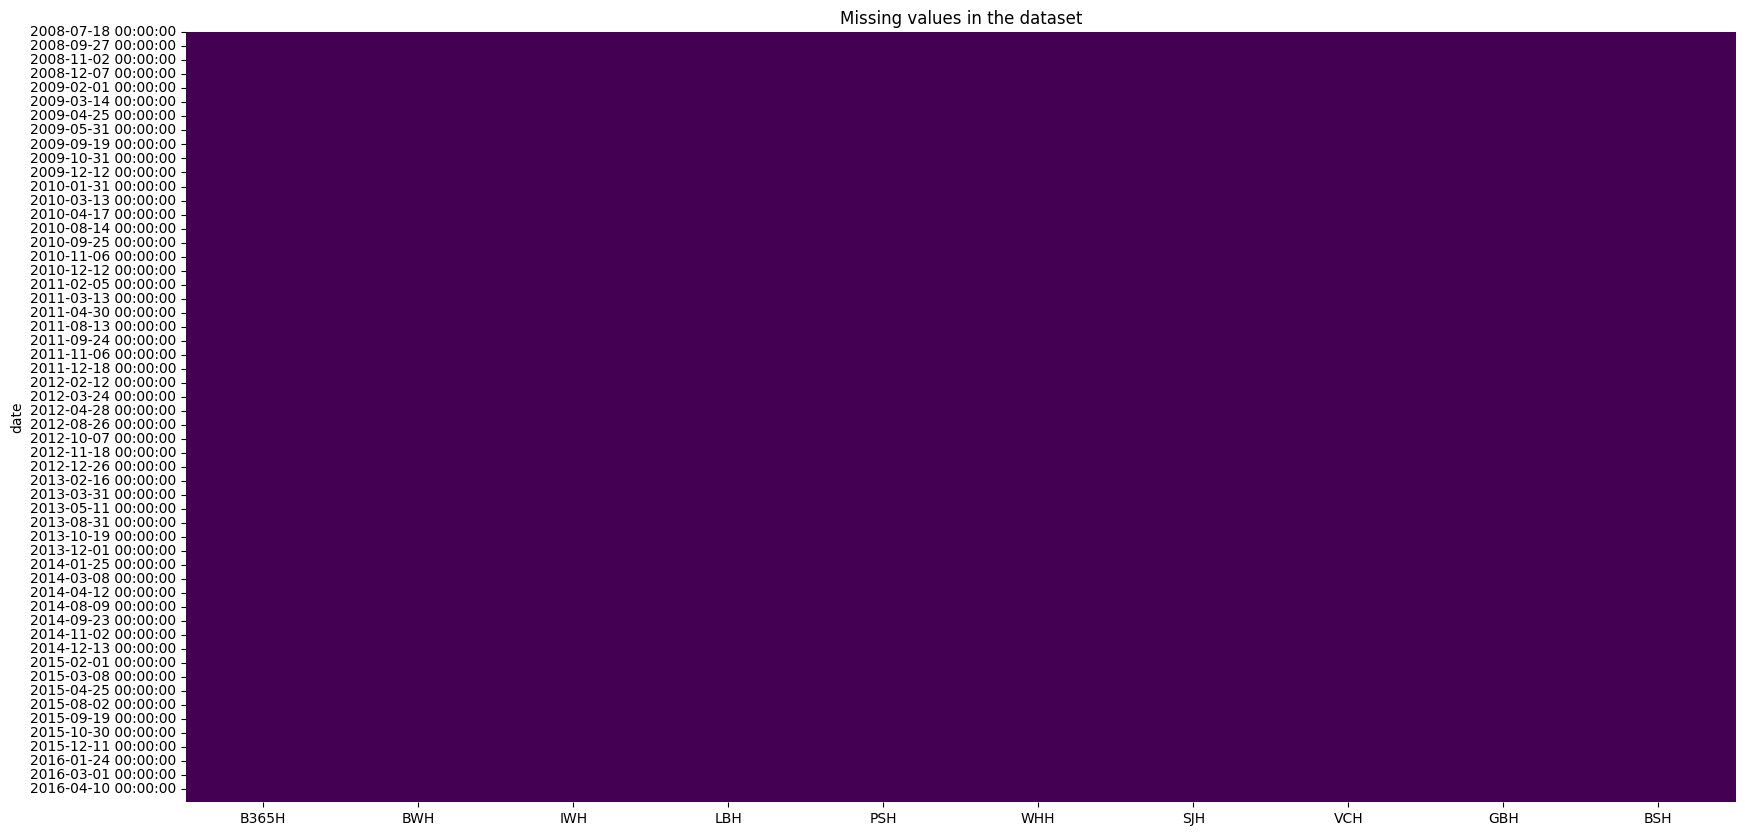

In [710]:
ar = matchs_v1[['date', 'B365H', 'BWH', 'IWH', 'LBH', 'PSH', 'WHH', 'SJH', 'VCH', 'GBH', 'BSH']]
ar = ar.set_index('date')
ar = ar.sort_index()
ar = ar.isnull().astype(int)

plt.figure(figsize=(20, 10))
sns.heatmap(ar, cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()



- Missing stats : [ 'goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession'] further parsing to do to extract the data
       No replacement for now
- Missing player lineups : no replacement for now
- Missing player position : no replacement for now

### Select the features

- All bookies odds before the match
- country id
- league id
- season
- home team id
- away team id
- home team goals [TO REMOVE for prediction]
- away team goals [TO REMOVE for prediction]
- FTR (Full Time Result) [TO REMOVE for prediction]

In [711]:
# features to keep
bookies_odds = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
matchs_info = ['country_id', 'league_id', 'season', 'stage', 'date',
        'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'FTR']

matchs_v1 = matchs_v1[matchs_info + bookies_odds]

### Features engineering

- Average goals scored by the home team season to date
- Average goals scored by the away team season to date

In [712]:
# Average goals scored by the home team season to date (average of last year if no match played yet)

def goals_stats(matchs_v1):
    goals_by_season_team = { season: { team: 0 for team in matchs_v1["home_team_api_id"].unique() } for season in matchs_v1["season"].unique() }
    number_of_match_played_season_team = { season: { team: 0 for team in matchs_v1["home_team_api_id"].unique() } for season in matchs_v1["season"].unique() }

    for index, row in matchs_v1.iterrows():
        home_team = row['home_team_api_id']
        away_team = row['away_team_api_id']
        season = row['season']
        home_team_goals = row['home_team_goal']
        away_team_goals = row['away_team_goal']

        matchs_v1.loc[index, 'home_team_goals_season_to_date_before_match'] = goals_by_season_team[season][home_team]
        matchs_v1.loc[index, 'away_team_goals_season_to_date_before_match'] = goals_by_season_team[season][away_team]

        matchs_v1.loc[index, 'home_team_number_of_match_played'] = number_of_match_played_season_team[season][home_team]
        matchs_v1.loc[index, 'away_team_number_of_match_played'] = number_of_match_played_season_team[season][away_team]

        matchs_v1.loc[index, 'avg_home_team_goals_season_to_date_before_match'] = goals_by_season_team[season][home_team] / number_of_match_played_season_team[season][home_team] if number_of_match_played_season_team[season][home_team] != 0 else 0
        matchs_v1.loc[index, 'avg_away_team_goals_season_to_date_before_match'] = goals_by_season_team[season][away_team] / number_of_match_played_season_team[season][away_team] if number_of_match_played_season_team[season][away_team] != 0 else 0

        number_of_match_played_season_team[season][home_team] += 1
        number_of_match_played_season_team[season][away_team] += 1

        goals_by_season_team[season][home_team] += home_team_goals
        goals_by_season_team[season][away_team] += away_team_goals


In [713]:
def feature_engineering(matchs_orig):

    matchs = matchs_orig.copy()

    ### GENERAL ###
    # Result of the match using final goal score of each team 
    # 1 : Victory of Home team
    # 0 : Draw
    # -1 : Victory of Away team
    matchs['FTR'] = matchs.apply(lambda x: 1 if x['home_team_goal'] > x['away_team_goal'] else 0 if x['home_team_goal'] == x['away_team_goal'] else -1, axis=1)

    # Prediction (1, 0, -1) of each bookie, depending on the odd the set at the beguinning of the match
    bookies = ['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'SJ', 'VC', 'GB', 'BS']
    for bookie in bookies:
        matchs[f'{bookie}_prediction'] = matchs.apply(lambda x: bookie_prediction(x, bookie), axis=1)

    # Probability of each bookie for each result depending on the odd the set, the margin is take fixed for every outcomes of each match
    for bookie in bookies:
        matchs[f'{bookie}H_prob'], matchs[f'{bookie}D_prob'], matchs[f'{bookie}A_prob'] = zip(*matchs.apply(lambda x: prob_by_bookies(x, bookie), axis=1))

    ### MISSING DATA ###
    # Replacing missing odd by the mean of the other bookies
    for bookie in bookies:
        matchs[f'{bookie}H'] = matchs[f'{bookie}H'].fillna(matchs[f'{bookie}H'].mean())
        matchs[f'{bookie}D'] = matchs[f'{bookie}D'].fillna(matchs[f'{bookie}D'].mean())
        matchs[f'{bookie}A'] = matchs[f'{bookie}A'].fillna(matchs[f'{bookie}A'].mean())

    ### FEATURES ###
    # Adding goal stats:
    # - home_team_goals_season_to_date_before_match
    # - away_team_goals_season_to_date_before_match
    # - home_team_number_of_match_played
    # - away_team_number_of_match_played
    # - avg_home_team_goals_season_to_date_before_match
    # - avg_away_team_goals_season_to_date_before_match
    goals_stats(matchs)

    # Adding date stats
    matchs['day_of_the_week'] = pd.to_datetime(matchs['date']).dt.dayofweek
    matchs['month'] = pd.to_datetime(matchs['date']).dt.month
    matchs['year'] = pd.to_datetime(matchs['date']).dt.year

    return matchs

- day of the week
- month
- year

In [714]:
matchs_v1['day_of_the_week'] = pd.to_datetime(matchs_v1['date']).dt.dayofweek
matchs_v1['month'] = pd.to_datetime(matchs_v1['date']).dt.month
matchs_v1['year'] = pd.to_datetime(matchs_v1['date']).dt.year

In [715]:
matchs_v1.head(5)

,country_id,league_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,FTR,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,day_of_the_week,month,year
24558,24558,24558,2008/2009,1,2008-07-18 00:00:00,10192,9931,1,2,-1,...,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663,4,7,2008
24559,24558,24558,2008/2009,1,2008-07-19 00:00:00,9930,10179,3,1,1,...,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663,5,7,2008
24560,24558,24558,2008/2009,1,2008-07-20 00:00:00,10199,9824,1,2,-1,...,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663,6,7,2008
24561,24558,24558,2008/2009,1,2008-07-20 00:00:00,7955,10243,1,2,-1,...,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663,6,7,2008
24613,24558,24558,2008/2009,2,2008-07-23 00:00:00,6493,7955,1,2,-1,...,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663,2,7,2008


### Train Test split

add schéma

In [762]:
def train_test_split_sliding_windows(df, split=5, test_prop=0.2, date_col="date"):
    """ 
    Split the dataset into training and testing set using sliding windows.

    Parameters
    ----------
    df : pd.DataFrame
        The dataset to split.
    split : int, optional
        The number of split. The default is 5.
    test_prop : float, optional
        The proportion of the testing set. The default is 0.2.
    date_col : str, optional
        The column containing the date. The default is "date".

    Returns
    -------
    train_test_split : list of tuple
        The list of tuple containing the training and testing set.
    """
    train_test_split = []
    train_size = int(df.shape[0] / (split + test_prop))
    test_size = int(train_size * test_prop)

    df.sort_values(by=date_col, inplace=True)

    for i in range(split):
        train = df.iloc[i*train_size:(i+1)*train_size]
        test = df.iloc[(i+1)*train_size:(i+1)*train_size + test_size]
        train_test_split.append((train, test))

    return train_test_split

In [717]:
def train_test_split_expanding_windows(df, split=5, test_prop=0.2, date_col="date"):
    """
    Split the dataset into training and testing set using expanding windows.

    Parameters
    ---------- 
    df : pd.DataFrame
        The dataset to split.
    split : int, optional
        The number of split. The default is 5.
    test_prop : float, optional
        The proportion of the testing set. The default is 0.2.
    date_col : str, optional
        The column containing the date. The default is "date".

    Returns
    -------
    train_test_split : list of tuple
        The list of tuple containing the training and testing set.
    """

    train_test_split = []
    train_size = int(df.shape[0] / (split + test_prop))
    test_size = int(train_size * test_prop)

    df.sort_values(by=date_col, inplace=True)

    for i in range(split):
        train = df.iloc[:train_size*(i+1)]
        test = df.iloc[train_size*(i+1):train_size*(i+1) + test_size]
        train_test_split.append((train, test))

    return train_test_split


In [718]:
date_split = '2015-01-01'
matchs_v1_train = matchs_v1[matchs_v1["date"] < date_split]
matchs_v1_test = matchs_v1[matchs_v1["date"] >= date_split]

### Features cleaning (final selection)

In [719]:
matchs_v1_train_X = matchs_v1_train.drop(columns=['FTR', 'home_team_goal', 'away_team_goal', 'season', 'date'])
matchs_v1_train_Y = matchs_v1_train["FTR"]

matchs_v1_test_X = matchs_v1_test.drop(columns=['FTR', 'home_team_goal', 'away_team_goal', 'season', 'date'])
matchs_v1_test_Y = matchs_v1_test["FTR"]

### Model training and testing

In [765]:
def train_test(matchs, pipeline, X_col, Y_col, 
    train_test_split_fn = lambda df : train_test_split_expanding_windows(df, split=5, test_prop=0.2, date_col="date")):

    train_test_split = train_test_split_fn(matchs)

    balanced_accuracy_list = []
    log_loss_list = []
    classwise_ECE_list = []

    for i, (train, test) in enumerate(train_test_split):
        X_train = train[X_col]
        Y_train = train[Y_col]
        X_test = test[X_col]
        Y_test = test[Y_col]

        pipeline.fit(X_train, Y_train)
        predictions = pipeline.predict(X_test)
        prob_predictions = pipeline.predict_proba(X_test)

        result_df = test.copy()
        result_df.reset_index(inplace=True)
        result_df = result_df.merge(pd.DataFrame(predictions, columns=['model_predictions']), how='left', on=result_df.index)
        result_df = result_df.drop(columns=['key_0'])
        result_df = result_df.merge(pd.DataFrame(prob_predictions, columns=['model_predictions_prob_away', 'model_predictions_prob_draw', 'model_predictions_prob_home']), how='left', on=result_df.index)

        accuracy, weighted_accuracy, (accuracy_home, accuracy_draw, accuracy_away) = accuracy_fn(result_df, result_df['FTR'], result_df[f'model_predictions'])
        recall_all, weighted_recall, balanced_accuracy, (recall_home, recall_draw, recall_away) = recall_fn(result_df, result_df['FTR'], result_df[f'model_predictions'])
        precision_all, weighted_precision, (precision_home, precision_draw, precision_away) = precision_fn(result_df, result_df['FTR'], result_df[f'model_predictions'])
        f_mesure_all, f_mesure_weighted, (f_mesure_home, f_mesure_draw, f_mesure_away) = f_mesure_fn(result_df, result_df['FTR'], result_df[f'model_predictions'])
        log_loss, (loss_home, loss_draw, loss_away) = log_loss_fn(result_df['FTR'], result_df['model_predictions_prob_home'], result_df['model_predictions_prob_draw'], result_df['model_predictions_prob_away'], all_results=True)
        mse, (mse_home, mse_draw, mse_away) = mse_loss_fn(result_df['FTR'], result_df['model_predictions_prob_home'], result_df['model_predictions_prob_draw'], result_df['model_predictions_prob_away'], all_results=True)
        classwise_ECE, (ECE_home, ECE_draw, ECE_away), _, _, _ = classwise_ECE_fn(result_df['FTR'], result_df['model_predictions_prob_home'], result_df['model_predictions_prob_draw'], result_df['model_predictions_prob_away'], all_results=True)

        balanced_accuracy_list.append(balanced_accuracy)
        log_loss_list.append(log_loss)
        classwise_ECE_list.append(classwise_ECE)

    return balanced_accuracy_list, log_loss_list, classwise_ECE_list



In [769]:
def train_test_bookies_comparision(matchs, pipeline, X_col, Y_col, 
    train_test_split_fn = lambda df : train_test_split_expanding_windows(df, split=5, test_prop=0.2, date_col="date"),
    bookies=['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'SJ', 'VC', 'GB', 'BS']):

    balanced_accuracy_bookies = {}
    log_loss_bookies = {}
    classwise_ECE_bookies = {}

    balanced_accuracy_model = {}
    log_loss_model = {}
    classwise_ECE_model = {}

    for bookie in bookies:
        matchs_bookie = matchs[matchs[f"{bookie}_prediction"] != -2]
        balanced_accuracy_list, log_loss_list, classwise_ECE_list = train_test(matchs_bookie, pipeline, X_col, Y_col, train_test_split_fn=train_test_split_fn)
        train_test_split = train_test_split_fn(matchs_bookie)

        balanced_accuracy_bookies[bookie] = 0
        log_loss_bookies[bookie] = 0
        classwise_ECE_bookies[bookie] = 0

        for i, (train, test) in enumerate(train_test_split):
            _, _, balanced_accuracy_bookies_i, _ = recall_fn(test, test['FTR'], test[f'{bookie}_prediction'])
            log_loss_i = log_loss_fn(test['FTR'], test[f'{bookie}H_prob'], test[f'{bookie}D_prob'], test[f'{bookie}A_prob'])
            classwise_ECE_i = classwise_ECE_fn(test['FTR'], test[f'{bookie}H_prob'], test[f'{bookie}D_prob'], test[f'{bookie}A_prob'], m=10)


            balanced_accuracy_bookies[bookie] += balanced_accuracy_bookies_i
            log_loss_bookies[bookie] += log_loss_i
            classwise_ECE_bookies[bookie] += classwise_ECE_i

        balanced_accuracy_bookies[bookie] /= len(train_test_split)
        log_loss_bookies[bookie] /= len(train_test_split)
        classwise_ECE_bookies[bookie] /= len(train_test_split)

        balanced_accuracy_model[bookie] = np.mean(balanced_accuracy_list)
        log_loss_model[bookie] = np.mean(log_loss_list)
        classwise_ECE_model[bookie] = np.mean(classwise_ECE_list)

    return balanced_accuracy_bookies, log_loss_bookies, classwise_ECE_bookies, balanced_accuracy_model, log_loss_model, classwise_ECE_model
        

### Logistic regression

In [763]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

matchs_v1 = feature_engineering(matchs)
X_col = ['country_id', 'league_id', 'stage', 'home_team_api_id',
       'away_team_api_id', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD',
       'GBA', 'BSH', 'BSD', 'BSA',
       'home_team_goals_season_to_date_before_match',
       'away_team_goals_season_to_date_before_match',
       'home_team_number_of_match_played', 'away_team_number_of_match_played',
       'avg_home_team_goals_season_to_date_before_match',
       'avg_away_team_goals_season_to_date_before_match', 'day_of_the_week',
       'month', 'year']
Y_col = ["FTR"]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

#### Expanding windows

In [770]:
train_test_split_fn = lambda df : train_test_split_expanding_windows(df, split=5, test_prop=0.2, date_col="date")
balanced_accuracy_list, log_loss_list, classwise_ECE_list = train_test(matchs_v1, pipeline, X_col, Y_col, train_test_split_fn=train_test_split_fn)

print(f"5 splits - pipeline = {pipeline} ")
print(f"balanced_accuracy_mean = {np.mean(balanced_accuracy_list)}")
print(f"log_loss_mean = {np.mean(log_loss_list)}")
print(f"classwise_ECE_mean = {np.mean(classwise_ECE_list)}")
print(f"balanced_accuracy = {balanced_accuracy_list}")
print(f"log_loss = {log_loss_list}")
print(f"classwise_ECE = {classwise_ECE_list}")

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was

5 splits - pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())]) 
balanced_accuracy_mean = 0.4315958405509746
log_loss_mean = 1.0599132056941376
classwise_ECE_mean = 0.030826775761062537
balanced_accuracy = [0.4337992481469191, 0.4324509808106723, 0.42545164090631243, 0.4389986086323791, 0.42727872425859004]
log_loss = [1.0360533881974305, 1.0029607333452983, 1.0651532158932486, 1.0940094553276882, 1.1013892357070227]
classwise_ECE = [0.042357171674551164, 0.034098812337584855, 0.026322780387810014, 0.02632694277380732, 0.025028171631559324]


In [771]:
balanced_accuracy_bookies, log_loss_bookies, classwise_ECE_bookies, balanced_accuracy_model, \
log_loss_model, classwise_ECE_model = train_test_bookies_comparision(matchs_v1, pipeline, X_col, Y_col, 
    train_test_split_fn = lambda df : train_test_split_expanding_windows(df, split=5, test_prop=0.2, date_col="date"),
    bookies=['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'SJ', 'VC', 'GB', 'BS'])

C:\Users\jdelavande\AppData\Local\Temp\ipykernel_10564\2306744142.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=date_col, inplace=True)
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

In [ ]:
df_results = pd.DataFrame([balanced_accuracy_bookies, log_loss_bookies, classwise_ECE_bookies, balanced_accuracy_model, log_loss_model, classwise_ECE_model])
df_results.index = ['balanced_accuracy_bookies', 'log_loss_bookies', 'classwise_ECE_bookies', 'balanced_accuracy_model', 'log_loss_model', 'classwise_ECE_model']
df_results

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
balanced_accuracy_bookies,0.449977,0.449774,0.450935,0.450740,0.445208,0.450245,0.438743,0.450260,0.450570,0.451944
log_loss_bookies,1.047653,1.048874,1.044936,1.048483,1.067540,1.039177,1.043603,1.044758,1.052157,1.050030
classwise_ECE_bookies,0.028792,0.028614,0.028162,0.027949,0.040793,0.027652,0.029456,0.026491,0.034997,0.037332
balanced_accuracy_model,0.444674,0.444433,0.446709,0.445669,0.441313,0.445445,0.435187,0.445019,0.441417,0.441367
log_loss_model,1.054102,1.051899,1.049065,1.051094,1.106710,1.057240,1.056705,1.053318,1.107069,1.099609
classwise_ECE_model,0.036488,0.035678,0.035599,0.036006,0.049018,0.034643,0.037327,0.036309,0.048461,0.046905


#### Sliding windows

In [742]:
train_test_split_fn = lambda df : train_test_split_sliding_windows(df, split=5, test_prop=0.2, date_col="date")
balanced_accuracy_list, log_loss_list, classwise_ECE_list = train_test(matchs_v1, pipeline, X_col, Y_col, train_test_split_fn=train_test_split_fn)

print(f"5 splits - pipeline = {pipeline} ")
print(f"balanced_accuracy_mean = {np.mean(balanced_accuracy_list)}")
print(f"log_loss_mean = {np.mean(log_loss_list)}")
print(f"classwise_ECE_mean = {np.mean(classwise_ECE_list)}")
print(f"balanced_accuracy = {balanced_accuracy_list}")
print(f"log_loss = {log_loss_list}")
print(f"classwise_ECE = {classwise_ECE_list}")

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was

5 splits - pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())]) 
balanced_accuracy_mean = 0.4266087369580909
log_loss_mean = 1.0732602591007763
classwise_ECE_mean = 0.05514851389281591
balanced_accuracy = [0.40737706086271636, 0.44163292019967787, 0.4346462020533865, 0.42410260138977357, 0.42528490028490024]
log_loss = [0.9427502093877734, 1.0554880185867919, 1.153762465965873, 1.108816929298638, 1.1054836722648054]
classwise_ECE = [0.08977043191696406, 0.0658962259221368, 0.06603150181278557, 0.026687824666393235, 0.027356585145799844]


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [772]:
balanced_accuracy_bookies, log_loss_bookies, classwise_ECE_bookies, balanced_accuracy_model, \
log_loss_model, classwise_ECE_model = train_test_bookies_comparision(matchs_v1, pipeline, X_col, Y_col, 
    train_test_split_fn = lambda df : train_test_split_sliding_windows(df, split=5, test_prop=0.2, date_col="date"),
    bookies=['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'SJ', 'VC', 'GB', 'BS'])

C:\Users\jdelavande\AppData\Local\Temp\ipykernel_10564\3265271820.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=date_col, inplace=True)
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

In [773]:
df_results = pd.DataFrame([balanced_accuracy_bookies, log_loss_bookies, classwise_ECE_bookies, balanced_accuracy_model, log_loss_model, classwise_ECE_model])
df_results.index = ['balanced_accuracy_bookies', 'log_loss_bookies', 'classwise_ECE_bookies', 'balanced_accuracy_model', 'log_loss_model', 'classwise_ECE_model']
df_results

,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
balanced_accuracy_bookies,0.449554,0.449827,0.450945,0.450341,0.445762,0.450751,0.439573,0.450063,0.451294,0.451335
log_loss_bookies,1.046825,1.047586,1.045798,1.048523,1.067552,1.038357,1.043832,1.043461,1.051205,1.050372
classwise_ECE_bookies,0.028778,0.028815,0.028394,0.027698,0.040094,0.027931,0.028569,0.026547,0.035569,0.037284
balanced_accuracy_model,0.446815,0.446058,0.448832,0.449980,0.446695,0.451518,0.436876,0.447774,0.433851,0.433279
log_loss_model,1.087116,1.088841,1.079640,1.078936,1.106185,1.091939,1.078859,1.084205,1.135613,1.133917
classwise_ECE_model,0.039891,0.040567,0.038697,0.040979,0.049191,0.037307,0.042372,0.039804,0.051857,0.050498


In [599]:
matchs_v1_train_X.columns

Index(['country_id', 'league_id', 'stage', 'home_team_api_id',
       'away_team_api_id', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD',
       'GBA', 'BSH', 'BSD', 'BSA',
       'home_team_goals_season_to_date_before_match',
       'away_team_goals_season_to_date_before_match',
       'home_team_number_of_match_played', 'away_team_number_of_match_played',
       'avg_home_team_goals_season_to_date_before_match',
       'avg_away_team_goals_season_to_date_before_match', 'day_of_the_week',
       'month', 'year'],
      dtype='object')

In [583]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logisticRegr.fit(matchs_v1_train_X, matchs_v1_train_Y)

predictions = logisticRegr.predict(matchs_v1_test_X)
score = logisticRegr.score(matchs_v1_test_X, matchs_v1_test_Y)

print(f"Accuracy: {score}")

Accuracy: 0.5061950439648282


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [591]:
#Comparaison with B365
bookie = 'B365'

prbas_log_regr = logisticRegr.predict_proba(matchs_v1_test_X)
    
mask = (matchs[f'{bookie}_prediction'] != -2) & (matchs["date"] >= date_split)
filtered_matchs = matchs[mask]

log_loss_bookies_bookie, \
    (log_los_bookies_home_bookie, log_los_bookies_draw_bookie, log_los_bookies_away_bookie) = log_loss(filtered_matchs['FTR'], 
    filtered_matchs[f'{bookie}H_prob'], filtered_matchs[f'{bookie}D_prob'], filtered_matchs[f'{bookie}A_prob'], 
    all_results=True)

log_loss_log_regr, \
    (log_los_log_regr_home, log_los_log_regr_draw, log_los_log_regr_away) = log_loss(filtered_matchs['FTR'], 
    pd.Series(prbas_log_regr[:, 1]), pd.Series(prbas_log_regr[:, 0]), pd.Series(prbas_log_regr[:, 2]),
    all_results=True)

log_loss_bookies_bookie, log_loss_log_regr



(1.067295123902257, 1.4211697295294854)

In [584]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=1000, multi_class='ovr')
logisticRegr.fit(matchs_v1_train_X, matchs_v1_train_Y)

predictions = logisticRegr.predict(matchs_v1_test_X)
score = logisticRegr.score(matchs_v1_test_X, matchs_v1_test_Y)

print(f"Accuracy: {score}")

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5073940847322143


In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0)
model.fit(matchs_v1_train_X, matchs_v1_train_Y)

predictions = model.predict_proba(matchs_v1_test_X)
score = model.score(matchs_v1_test_X, matchs_v1_test_Y)
print(f"Accuracy: {score}")


In [ ]:

print(f'accuracy_train = {model.score(matchs_v1_train_X, matchs_v1_train_Y)}')

In [ ]:
print(list(predictions))

In [ ]:
# count the numer of zeros in predictions
print(list(predictions).count(1))

In [ ]:
def log_loss(result_serie, home_prob_serie, draw_prob_serie, away_prob_serie):
    log_loss = 0
    result_serie = result_serie.reset_index(drop=True)
    for index, result in result_serie.items():
        home_prob = home_prob_serie[index]
        draw_prob = draw_prob_serie[index]
        away_prob = away_prob_serie[index]
        if result == 1:
            log_loss += - np.log(home_prob)
        if result == 0:
            log_loss += - np.log(draw_prob)
        if result == -1:
            log_loss += - np.log(away_prob)
    return log_loss / len(result_serie)

In [ ]:
model.classes_

In [ ]:
log_loss(matchs_v1_test_Y, predictions[:, 2], predictions[:, 1], predictions[:, 0])

In [ ]:
classwise_ECE(matchs_v1_test_Y, predictions[:, 2], predictions[:, 1], predictions[:, 0])